# Import libraries and Import Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from scipy import stats
import os
import seaborn as sns
from scipy.stats import f_oneway

In [118]:
os.chdir('C:/Users/Marion Späth/Desktop/ADS/Thesis/Data')

df = pd.read_excel("all_y_p_v2.xlsx")
df.head()

,hhid_r4,id,buy_nr_cattle_r4,buy_cattle_r4,buy_nr_goat_r4,buy_goat_r4,n_previd_cattle_r4,n_previd_goat_r4,cs_cs_diff_post_cattle_r4,cs_cs_ratio_post_cattle_r4,...,s19q16_r2,s1913_2_r2,hhid,eng_language,amh_language,afm_language,agric_land,irrigated_land,expend,risky
0,1012410003,1,0,Not buy,0,Not buy,2,10,-188.170624,0.0,...,Yes,NaN,1.012410e+09,No,No,No,Yes,2.0,0.0,70.0
1,1012420005,2,0,Not buy,0,Not buy,2,10,-850.367249,0.0,...,Yes,NaN,1.012420e+09,No,No,Yes,Yes,0.0,0.0,20.0
2,1012420006,3,0,Not buy,0,Not buy,10,15,-5219.686523,0.0,...,Yes,NaN,1.012420e+09,No,No,Yes,No,NaN,1.0,22.0
3,1012420008,4,0,Not buy,0,Not buy,2,5,-157.544266,0.0,...,Yes,NaN,1.012420e+09,No,No,No,Yes,0.0,0.0,33.0
4,1012420021,5,0,Not buy,0,Not buy,0,12,NaN,NaN,...,Yes,NaN,1.012420e+09,No,No,No,Yes,2.0,1.0,34.0


# Some custom functions

In [121]:
def check_categories(df):
    """ Function takes a dataframe and prints frequencies per category if variable categorical and min / max if numeric. Number of missing values for per var """
    for var in df.columns:
        print("Variable:", var)
        if df[var].dtype == 'object':
            print(f"\nValue counts for '{var}':")
            print(df[var].value_counts(dropna=False))
            print("Number of Missing Values:", df[var].isna().sum())

        else: 
            print("Min:", df[var].min())
            print("Max:", df[var].max())
            print("Mean:", df[var].dropna().mean())
            print("Std:", df[var].dropna().std())
            print("Number of Missing Values:", df[var].isna().sum())
        print("\n")

# Exploratory Analysis of Outcome

--> the ratio outcome seems to have very little variation and most people are close to 0

In [8]:
print("Min:", df.cs_cs_ratio_post_cattle_r3.min())
print("Max:", df.cs_cs_ratio_post_cattle_r3.max())

Min: -8.067450523376465
Max: 1.0


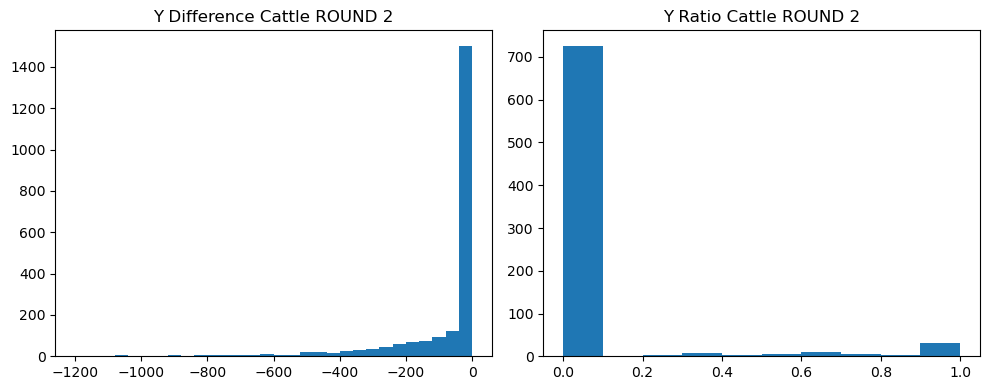

In [9]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df.cs_cs_diff_post_cattle_r2, bins=30, range=[-1200, 0])
axes[0].set_title("Y Difference Cattle ROUND 2")

axes[1].hist(df.cs_cs_ratio_post_cattle_r2, bins=10, range=[0, 1])
axes[1].set_title("Y Ratio Cattle ROUND 2")
plt.tight_layout()

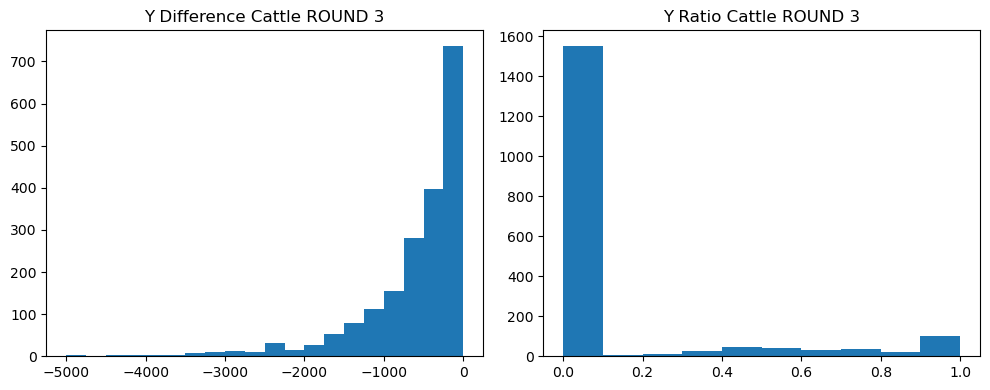

In [10]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df.cs_cs_diff_post_cattle_r3, bins=20, range=[-5000, 0])
axes[0].set_title("Y Difference Cattle ROUND 3")

axes[1].hist(df.cs_cs_ratio_post_cattle_r3, bins=10, range=[0, 1])
axes[1].set_title("Y Ratio Cattle ROUND 3")
plt.tight_layout()

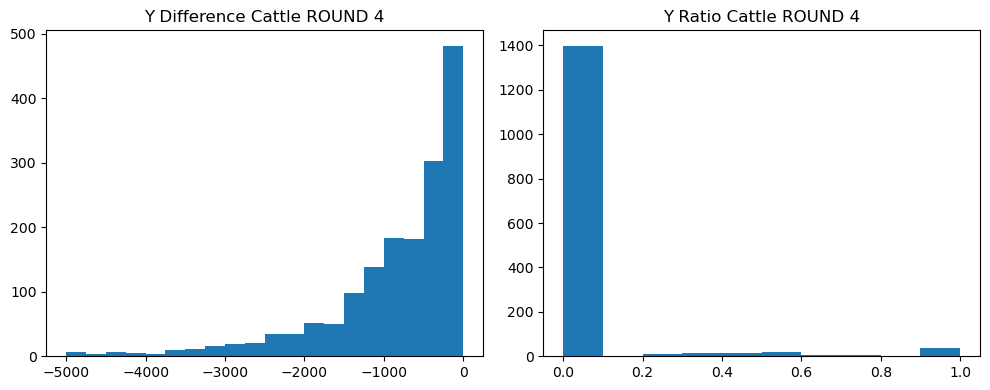

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))

axes[0].hist(df.cs_cs_diff_post_cattle_r4, bins=20, range=[-5000, 0])
axes[0].set_title("Y Difference Cattle ROUND 4")

axes[1].hist(df.cs_cs_ratio_post_cattle_r4, bins=10, range=[0, 1])
axes[1].set_title("Y Ratio Cattle ROUND 4")
plt.tight_layout()

# Age Variables

--> One third of respondents changes their age. But only a small portion in a plausible way (+1/+2). The rest has strong changes e.g., from 75 to 24, 35 to 45 etc.

--> Ask for best practises and details of data collection. I would otherwise use age as a constant variable and choose the first age ever indicated.

In [122]:
age_vars = df[["id","s3_q7_r2", "s3_q7_0_r2", "s3_q7_1_r2", "s3_q7_r3", "s3_q7_0_r3", "s3_q7_1_r3", "s3_q7_r4", "s3_q7_0_r4", "s3_q7_1_r4" ]]
age_vars = age_vars.rename(columns={'s3_q7_r2': 'recorded_age_r2', 's3_q7_0_r2': 'recorded_age_correct_r2', 's3_q7_1_r2': 'age_updated_r2',
                                    's3_q7_r3': 'recorded_age_r3', 's3_q7_0_r3': 'recorded_age_correct_r3', 's3_q7_1_r3': 'age_updated_r3',
                                    's3_q7_r4': 'recorded_age_r4', 's3_q7_0_r4': 'recorded_age_correct_r4', 's3_q7_1_r4': 'age_updated_r4'})
age_vars

,id,recorded_age_r2,recorded_age_correct_r2,age_updated_r2,recorded_age_r3,recorded_age_correct_r3,age_updated_r3,recorded_age_r4,recorded_age_correct_r4,age_updated_r4
0,1,25.0,No,36.0,36,Yes,NaN,36,Yes,NaN
1,2,27.0,No,47.0,47,Yes,NaN,47,Yes,NaN
2,3,29.0,Yes,NaN,29,Yes,NaN,29,Yes,NaN
3,4,35.0,Yes,NaN,35,Yes,NaN,35,Yes,NaN
4,5,36.0,Yes,NaN,36,Yes,NaN,36,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...
2411,2412,46.0,Yes,NaN,46,Yes,NaN,46,Yes,NaN
2412,2413,45.0,Yes,NaN,45,Yes,NaN,45,Yes,NaN
2413,2414,38.0,No,26.0,26,Yes,NaN,26,Yes,NaN
2414,2415,56.0,No,20.0,20,Yes,NaN,20,Yes,NaN


In [123]:
# Denote missing and implausible (e.g., 999 or 560) values
#numeric_cols = age_vars.select_dtypes(include='number').columns
#age_vars[numeric_cols] = age_vars[numeric_cols].mask((age_vars[numeric_cols] <= -99) | (age_vars[numeric_cols] > 99), np.nan)

numeric_cols = age_vars.select_dtypes(include='number').columns.drop('id')
age_vars[numeric_cols] = age_vars[numeric_cols].mask(
    (age_vars[numeric_cols] <= -99) | (age_vars[numeric_cols] > 99),
    np.nan)

In [124]:
# check how many individuals (dont) change their age across waves
age_vars['age_changes'] = age_vars.apply(lambda row: row['recorded_age_r2'] if 
                                          pd.notna(row['recorded_age_r2']) and 
                                          row['recorded_age_correct_r3'] == 'Yes' and 
                                          row['recorded_age_correct_r4'] == 'Yes' and
                                          row['recorded_age_correct_r2'] == 'Yes' else # row['age_updated_r2'] if pd.notna(row['age_updated_r2']) and (row['recorded_age_correct_r3']=='Yes') and  (row['recorded_age_correct_r4']=='Yes') else
                                          np.nan,
    axis=1
)
age_vars
age_vars.age_changes.isna().value_counts() # One third changes their age


age_changes
False    1619
True      797
Name: count, dtype: int64

In [125]:
# always choose first age
    ## there are 7 missing values in r2, but they are then updated and resolved, but 1 of them indicates 1 as age, later in r3 changes to 60..
age_vars['age_constant'] = age_vars.apply(lambda row: row['recorded_age_r2'] if 
                                          pd.notna(row['recorded_age_r2']) else row['age_updated_r2'] if
                                          pd.notna(row['age_updated_r2']) else row['age_updated_r3'] if
                                          pd.notna(row['age_updated_r3']) else row['age_updated_r4'], axis=1 )
age_vars.head()
#age_vars.age_constant.isna().value_counts() --> 22 rows have no age ever recoded ( but also id is missing??)
#test = age_vars[age_vars['age_constant'].isna()] 
#test

,id,recorded_age_r2,recorded_age_correct_r2,age_updated_r2,recorded_age_r3,recorded_age_correct_r3,age_updated_r3,recorded_age_r4,recorded_age_correct_r4,age_updated_r4,age_changes,age_constant
0,1,25.0,No,36.0,36.0,Yes,NaN,36.0,Yes,NaN,NaN,25.0
1,2,27.0,No,47.0,47.0,Yes,NaN,47.0,Yes,NaN,NaN,27.0
2,3,29.0,Yes,NaN,29.0,Yes,NaN,29.0,Yes,NaN,29.0,29.0
3,4,35.0,Yes,NaN,35.0,Yes,NaN,35.0,Yes,NaN,35.0,35.0
4,5,36.0,Yes,NaN,36.0,Yes,NaN,36.0,Yes,NaN,36.0,36.0


In [126]:
age_vars['age_constant'].isna().sum() # 22 missing values

22

In [127]:
# to check how many change their age in a plausible way +1 /+2 depending on data collection --> not many
age_vars['test'] = np.where(
    (age_vars['age_constant'].notna()) & 
    (age_vars['recorded_age_r4'].notna()) & 
    (age_vars['age_constant'] == (age_vars['recorded_age_r4'] -1)),
    1,
    0)
age_vars.test.value_counts()

test
0    2348
1      68
Name: count, dtype: int64

Text(0.5, 1.0, 'age_constant')

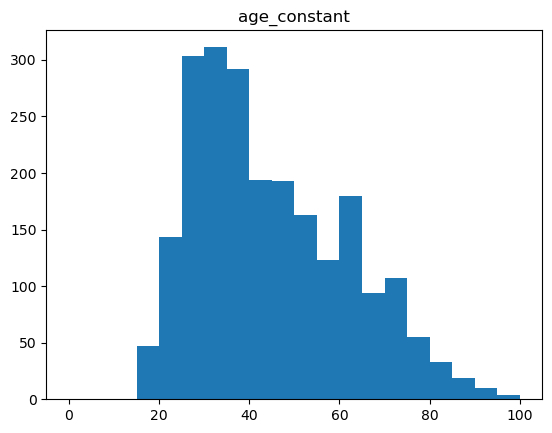

In [17]:
plt.hist(age_vars.recorded_age_r2, bins=20, range=[0,100])
plt.title("age_constant")

## Children Variables

--> recommend to use activity_child instead of reason_not_in_school_child. The variables have VERY similar categories but the reson_not... has more missings when child is in school, the activity_child corretly classifies the child as a student.	

In [128]:
children_vars = df[["id", "s5q7_r4", "s5_q7_5_n1_r4", "s5_q7_9_n1_r4", "s5_q8_3_n1_r4", "s5q7_r3", "s5_q7_5_n1_r3", "s5_q7_9_n1_r3", "s5_q8_3_n1_r3", "s5q7_r2", "s5_q7_5_n1_r2", "s5_q7_9_n1_r2", "s5_q8_3_n1_r2"]]
children_vars = children_vars.rename(columns={"s5q7_r4": "number_minors_r4",
                                              "s5_q7_5_n1_r4": "educ_child_r4",
                                              "s5_q7_9_n1_r4": "reason_not_in_school_child_r4",
                                              "s5_q8_3_n1_r4": "activity_child_r4",
                                              "s5q7_r3": "number_minors_r3", 
                                              "s5_q7_5_n1_r3": "educ_child_r3", 
                                              "s5_q7_9_n1_r3" : "reason_not_in_school_child_r3", 
                                              "s5_q8_3_n1_r3": "activity_child_r3", 
                                              "s5q7_r2": "number_minors_r2", 
                                              "s5_q7_5_n1_r2": "educ_child_r2", 
                                              "s5_q7_9_n1_r2": "reason_not_in_school_child_r2", 
                                              "s5_q8_3_n1_r2": "activity_child_r2"})
children_vars.head(5)

,id,number_minors_r4,educ_child_r4,reason_not_in_school_child_r4,activity_child_r4,number_minors_r3,educ_child_r3,reason_not_in_school_child_r3,activity_child_r3,number_minors_r2,educ_child_r2,reason_not_in_school_child_r2,activity_child_r2
0,1,2,Never attended school,Working for household own production (e.g.herding,Herding household-owned livestock,3,Never attended school,Too young,Not working: too young,2,Grade 3,NaN,Student
1,2,2,Never attended school,Too young,Not working: too young,5,Never attended school,Working for household own production (e.g.herding,Herding household-owned livestock,3,Grade 2,NaN,Student
2,3,2,Never attended school,Working for household own production (e.g.herding,Herding household-owned livestock,3,Never attended school,"Domestic duties (e.g. cooking, taking care of ...","Livestock production e.g. milking, sale of liv...",4,Never attended school,Working for household own production (e.g.herding,Herding household-owned livestock
3,4,3,Grade 6,NaN,Student,3,Never attended school,Too young,Not working: too young,6,Never attended school,Working for household own production (e.g.herding,Herding household-owned livestock
4,5,3,Never attended school,"Domestic duties (e.g. cooking, taking care of ...",Herding household-owned livestock,5,Never attended school,Working for household own production (e.g.herding,Herding household-owned livestock,5,Never attended school,Working for household own production (e.g.herding,Herding household-owned livestock


In [129]:
#test = children_vars[children_vars['activity_child_r2'].isna()]
#test

remove reason_not_in_school_child variable

In [130]:
children_vars = children_vars.drop(columns=["reason_not_in_school_child_r4", "reason_not_in_school_child_r3", "reason_not_in_school_child_r2"])

In [131]:
check_categories(children_vars)

Variable: id
Min: 1
Max: 2416
Mean: 1208.5
Std: 697.5834478158629
Number of Missing Values: 0


Variable: number_minors_r4
Min: 0
Max: 8
Mean: 2.806291390728477
Std: 1.4396549464179555
Number of Missing Values: 0


Variable: educ_child_r4

Value counts for 'educ_child_r4':
educ_child_r4
Never attended school                1052
Grade 2                               190
Grade 3                               158
Grade 4                               155
Grade 5                               147
Grade 6                               130
Grade 1                               116
Grade 7                               108
Grade 8                                95
NaN                                    83
Secondary 9                            56
Secondary 10                           32
Preparatory 11                         23
Preparatory 12                         17
Alternative Basic Education (ABE)      15
Nursery                                14
Adult Education                        1

In [276]:
# Define the recoding map
recode_map = {
    "Never attended school": "Never attended school",
    "Nursery": "Grade 1",
    "Grade 1": "Grade 1",
    "Grade 2": "Grade 2",
    "Grade 3": "Grade 3",
    "Grade 4": "Grade 4",
    "Grade 5": "Grade 5",
    "Grade 6": "Grade 6",
    "Grade 7": "Grade 7",
    "Grade 8": "Grade 8",
    "Secondary 9": "Secondary",
    "Secondary 10": "Secondary",
    "Preparatory 11": "Preparatory",
    "Preparatory 12": "Preparatory",
    "Alternative Basic Education (ABE)": "Other",
    "Adult Education": "Other",
    "Diploma": "Other",
    "Degree": "Other",
    "Postgraduate": "Other",
    "Other, specify": "Other",
    "Technical education" : "Other",
    "Certificate level teachers": "Other"
    }


# List of columns to recode
columns_to_recode = ['educ_child_r2', 'educ_child_r3', 'educ_child_r4']

# Apply the same map to all selected columns and create new columns
for col in columns_to_recode:
    children_vars[f'{col}_recoded'] = children_vars[col].map(recode_map)

children_vars.head(2)

,id,number_minors_r4,educ_child_r4,activity_child_r4,number_minors_r3,educ_child_r3,activity_child_r3,number_minors_r2,educ_child_r2,activity_child_r2,educ_child_r2_recoded,educ_child_r3_recoded,educ_child_r4_recoded
0,1,2,Never attended school,Herding household-owned livestock,3,Never attended school,Not working: too young,2,Grade 3,Student,Grade 3,Never attended school,Never attended school
1,2,2,Never attended school,Not working: too young,5,Never attended school,Herding household-owned livestock,3,Grade 2,Student,Grade 2,Never attended school,Never attended school


In [ ]:



recode_map_activity = {
    "Student": "Student",
    "Not working: too young": "Not working: too young",
    "Herding household-owned livestock": "Herding household-owned livestock",
    "House/domestic work": "House/domestic work",
    "Livestock production e.g. milking, sale of livestock products": "Livestock production e.g. milking, sale of livestock products",
    "Petty trading e.g charcoal/water trading": "Petty trading e.g charcoal/water trading",
    "Not working: unable": "Not working: unable",
    "Looking for job": "Looking for job",
    "Casual labor e.g. herding for pay": "Casual labor e.g. herding for pay",
    "Not working: too old": "Not working: too old",
    "Livestock trading/broker": "Livestock trading/broker",
    "Shop/business owner": "Shop/business owner",
    "Wage/salaried employment": "Wage/salaried employment",
    "Mining": "Mining",
    "Other, specify" : "Other, specify",
    "Farming non-livestock" : "Farming non-livestock",
    "Unpaid work in family's shop/business" : "Unpaid work in family's shop/business" 
}


                                                                           
                                                                                                                

In [132]:
children_vars.columns

Index(['id', 'number_minors_r4', 'educ_child_r4', 'activity_child_r4',
       'number_minors_r3', 'educ_child_r3', 'activity_child_r3',
       'number_minors_r2', 'educ_child_r2', 'activity_child_r2'],
      dtype='object')

# Chips Variables

--> variables seem to have no missings, check codebook to be sure!

In [133]:
chip_vars = df[["id", "s8_1_r2", "s8_2_r2", "s8_3_r2", "s8_4_r2", "s8_5_r2", "s8_6_r2", "s8_7_r2",
                "s8_1_r3", "s8_2_r3", "s8_3_r3", "s8_4_r3", "s8_5_r3", "s8_6_r3", "s8_7_r3",
                "s8_1_r4", "s8_2_r4", "s8_3_r4", "s8_4_r4", "s8_5_r4", "s8_6_r4", "s8_7_r4"]]
chip_vars = chip_vars.rename(columns={"s8_1_r2" : "chips_kalo_farm_land_r2", "s8_2_r2" : "chips_alcohol_r2", "s8_3_r2" : "chips_chew_khat_r2", "s8_4_r2" : "chips_water_source_r2", "s8_5_r2" : "chips_sell_livestock_investment_r2", "s8_6_r2" : "chips_migration_conflict_r2", "s8_7_r2" : "chips_overnight_r2", 
                                      "s8_1_r3" : "chips_kalo_farm_land_r3", "s8_2_r3" : "chips_alcohol_r3", "s8_3_r3" : "chips_chew_khat_r3", "s8_4_r3" : "chips_water_source_r3", "s8_5_r3" : "chips_sell_livestock_investment_r3", "s8_6_r3" : "chips_migration_conflict_r3", "s8_7_r3" : "chips_overnight_r3", 
                                      "s8_1_r4" : "chips_kalo_farm_land_r4", "s8_2_r4" : "chips_alcohol_r4", "s8_3_r4" : "chips_chew_khat_r4", "s8_4_r4" : "chips_water_source_r4", "s8_5_r4" : "chips_sell_livestock_investment_r4", "s8_6_r4" : "chips_migration_conflict_r4", "s8_7_r4" : "chips_overnight_r4"})
chip_vars

,id,chips_kalo_farm_land_r2,chips_alcohol_r2,chips_chew_khat_r2,chips_water_source_r2,chips_sell_livestock_investment_r2,chips_migration_conflict_r2,chips_overnight_r2,chips_kalo_farm_land_r3,chips_alcohol_r3,...,chips_sell_livestock_investment_r3,chips_migration_conflict_r3,chips_overnight_r3,chips_kalo_farm_land_r4,chips_alcohol_r4,chips_chew_khat_r4,chips_water_source_r4,chips_sell_livestock_investment_r4,chips_migration_conflict_r4,chips_overnight_r4
0,1,4,3,2,6,7,1,1,1,1,...,1,3,2,5,2,2,4,5,1,1
1,2,5,2,3,6,7,2,2,9,1,...,9,4,5,8,2,2,6,2,10,10
2,3,3,1,1,2,2,5,5,1,1,...,4,3,2,1,3,2,1,1,1,1
3,4,1,3,6,1,1,1,1,1,1,...,3,2,1,3,5,3,1,2,1,1
4,5,1,4,7,1,1,1,1,1,1,...,4,3,4,5,2,2,6,5,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2412,5,3,3,7,8,6,4,8,2,...,9,6,4,2,2,2,3,3,3,3
2412,2413,1,1,1,10,8,2,1,1,1,...,1,1,1,4,3,3,8,9,1,1
2413,2414,1,2,5,3,2,2,1,1,1,...,1,1,1,6,4,2,6,2,5,10
2414,2415,4,1,1,1,2,2,1,2,3,...,3,4,3,3,3,4,3,6,4,2


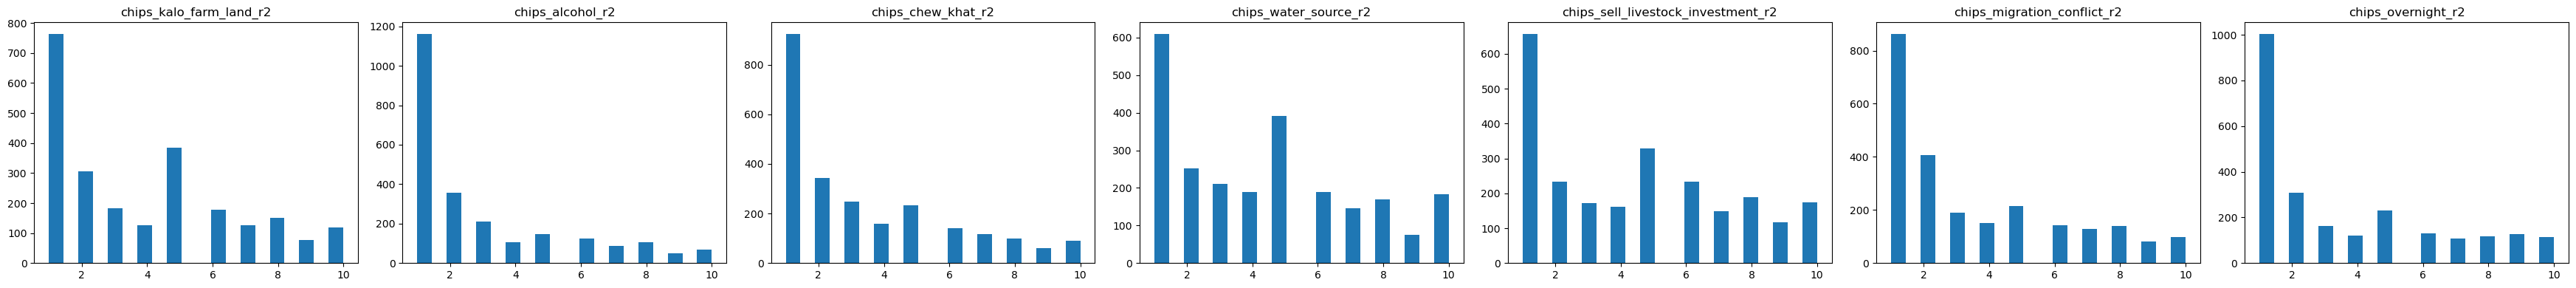

In [134]:
# Inspect distribution of chips variables for WAVE 2
chips_q = ['chips_kalo_farm_land_r2', 'chips_alcohol_r2', 'chips_chew_khat_r2', 'chips_water_source_r2', 'chips_sell_livestock_investment_r2', 'chips_migration_conflict_r2', 'chips_overnight_r2']

def chips_distribution(columns):
    fig, axes = plt.subplots(1, len(columns), figsize=(5 * len(columns), 4))
    for ax, var in zip(np.ravel(axes), columns):
        ax.hist(chip_vars[var].dropna(), bins=20)
        ax.set_title(var)
    plt.tight_layout()
    plt.show()

chips_distribution(chips_q)

In [135]:
# Number of missings
for var in chips_q:
    print("Variable:", var)
    print(chip_vars[var].isna().sum())

Variable: chips_kalo_farm_land_r2
0
Variable: chips_alcohol_r2
0
Variable: chips_chew_khat_r2
0
Variable: chips_water_source_r2
0
Variable: chips_sell_livestock_investment_r2
0
Variable: chips_migration_conflict_r2
0
Variable: chips_overnight_r2
0


# Education Variables

--> Coding in r4 seems to changes for: highest_educ_r4 not just numeric but also inconsistent, e.g., rows who previosly never attended school have either 1 or 2 (perhaps also others)

--> also, sometimes respondents say previous record was not correct but then indicate the same thing again??

In [136]:
educ_vars = df[["id", "s3_q8_r2", "s3_q8_0_r2", "s3_q8_1_r2", "s3_q8_r3", "s3_q8_0_r3", "s3_q8_1_r3" , "s3_q8_r4", "s3_q8_0_r4", "s3_q8_1_r4"]] #s3_q8_1oth_r4
educ_vars = educ_vars.rename(columns={"s3_q8_r2" : "highest_educ_r2", "s3_q8_0_r2" : "highest_educ_correct_r2", "s3_q8_1_r2" : "highest_educ_updated_r2", 
                                      "s3_q8_r3" : "highest_educ_r3", "s3_q8_0_r3" : "highest_educ_correct_r3", "s3_q8_1_r3" : "highest_educ_updated_r3" ,
                                      "s3_q8_r4" : "highest_educ_r4", "s3_q8_0_r4" : "highest_educ_correct_r4", "s3_q8_1_r4" : "highest_educ_updated_r4"})

In [137]:
check_categories(educ_vars)

Variable: id
Min: 1
Max: 2416
Mean: 1208.5
Std: 697.5834478158629
Number of Missing Values: 0


Variable: highest_educ_r2

Value counts for 'highest_educ_r2':
highest_educ_r2
Never attended school        1654
Nursery                       259
Adult Education                73
Grade 3                        50
Grade 4                        49
Grade 6                        43
Grade 2                        43
Grade 5                        41
Grade 8                        36
Alternative Basic Educati      34
Secondary 10                   30
Grade 7                        27
Secondary 9                    26
Grade 1                        16
Preparatory 12                  7
Diploma                         7
Preparatory 11                  7
NaN                             7
Degree                          5
Postgraduate                    1
Technical education             1
Name: count, dtype: int64
Number of Missing Values: 7


Variable: highest_educ_correct_r2

Value counts for 'hi

In [267]:
educ_vars.highest_educ_correct_r2.value_counts()
test = educ_vars[educ_vars['highest_educ_correct_r3']== 'No']
test.head(25)

,id,highest_educ_r2,highest_educ_correct_r2,highest_educ_updated_r2,highest_educ_r3,highest_educ_correct_r3,highest_educ_updated_r3,highest_educ_r4,highest_educ_correct_r4,highest_educ_updated_r4
11,12,Never attended school,Yes,NaN,Never attended school,No,Grade 6,1,Yes,NaN
31,32,Never attended school,Yes,NaN,Never attended school,No,Secondary 9,2,Yes,NaN
38,39,Grade 6,Yes,NaN,Grade 6,No,Never attended school,2,No,Never attended school
186,187,Never attended school,Yes,NaN,Never attended school,No,Grade 8,3,Yes,NaN
244,245,Grade 7,Yes,NaN,Grade 7,No,Never attended school,3,Yes,NaN
247,248,Nursery,Yes,NaN,Nursery,No,Never attended school,3,Yes,NaN
252,253,Nursery,Yes,NaN,Nursery,No,Never attended school,1,Yes,NaN
282,283,Nursery,Yes,NaN,Nursery,No,Never attended school,3,Yes,NaN
287,288,Nursery,Yes,NaN,Nursery,No,Secondary 10,1,Yes,NaN
289,290,Alternative Basic Educati,Yes,NaN,NaN,No,Grade 7,2,Yes,NaN


There are many inconsistencies with the education variable:
1. People might say the recorded information is wrong just to say the same thing again
2. People correct themselves to have less education than previously indicated
3. The numeric coding for round 4 seems faulty. It obscures a lot of the previous variation

--> Perhaps best to treat it like age. Take the first indication and treat it as stable / time-invariant

In [139]:
test = educ_vars[educ_vars['highest_educ_r2'] != educ_vars['highest_educ_r3']]
#test = educ_vars[educ_vars['highest_educ_r4'].notna()]

test.head(35)

,id,highest_educ_r2,highest_educ_correct_r2,highest_educ_updated_r2,highest_educ_r3,highest_educ_correct_r3,highest_educ_updated_r3,highest_educ_r4,highest_educ_correct_r4,highest_educ_updated_r4
26,27,Grade 3,No,Never attended school,Never attended school,Yes,NaN,3,Yes,NaN
57,58,Nursery,No,Never attended school,Never attended school,Yes,NaN,2,Yes,NaN
59,60,Alternative Basic Educati,No,Adult Education,Adult Education,Yes,NaN,2,Yes,NaN
82,83,Nursery,No,Never attended school,Never attended school,Yes,NaN,3,Yes,NaN
99,100,Nursery,No,Never attended school,Never attended school,Yes,NaN,2,Yes,NaN
111,112,Grade 6,No,Never attended school,Never attended school,Yes,NaN,1,Yes,NaN
113,114,Preparatory 12,No,Never attended school,Never attended school,Yes,NaN,1,Yes,NaN
120,121,Grade 3,No,Never attended school,Never attended school,Yes,NaN,2,No,Never attended school
123,124,Grade 1,No,Never attended school,Never attended school,Yes,NaN,2,Yes,NaN
128,129,Nursery,No,Never attended school,Never attended school,Yes,NaN,2,Yes,NaN


# Household Variables

--> household_description_other variables are not needed, they are never used and therefore always all missing

--> there is one outlier in number_adults_r4 --> number of adults 60! --> set it missing and then forward fill

In [140]:
household_var = df[["id", "s5_q3_r2", "s5q5_r2", "s5_q3_r3", "s5q5_r3", "s5_q3_r4", "s5q5_r4"]] #s5_q3oth_r2
household_var = household_var.rename(columns={"s5_q3_r2" : "household_description_r2", "s5q5_r2" : "number_adults_r2", 
                                              "s5_q3_r3" : "household_description_r3", "s5q5_r3" : "number_adults_r3", 
                                              "s5_q3_r4" : "household_description_r4", "s5q5_r4" : "number_adults_r4"})

In [141]:
check_categories(household_var)

Variable: id
Min: 1
Max: 2416
Mean: 1208.5
Std: 697.5834478158629
Number of Missing Values: 0


Variable: household_description_r2

Value counts for 'household_description_r2':
household_description_r2
Fully settled: The whole of the household (all members, including head) is permanently settled                                    2044
Partially settled: Some members of the household are permanently settled and others move around in order to herd their animals     312
Not settled: The whole household moves around in order to herd the animals                                                          60
Name: count, dtype: int64
Number of Missing Values: 0


Variable: number_adults_r2
Min: 0
Max: 10
Mean: 2.3973509933774833
Std: 1.314443264580191
Number of Missing Values: 0


Variable: household_description_r3

Value counts for 'household_description_r3':
household_description_r3
Fully settled: The whole of the household (all members, including head) is permanently settled                 

(array([  83.,  282., 1340.,  341.,  189.,   95.,   50.,   20.,   12.,
          4.]), array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]), <BarContainer object of 10 artists>)
(array([4.450e+02, 1.212e+03, 3.340e+02, 3.200e+02, 6.500e+01, 1.800e+01,
       1.500e+01, 4.000e+00, 1.000e+00, 2.000e+00]), array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]), <BarContainer object of 10 artists>)


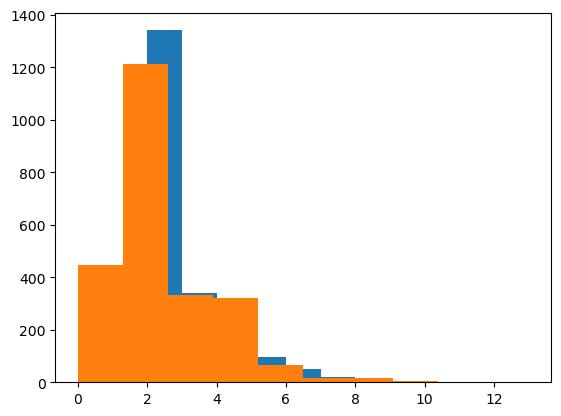

In [142]:
print(plt.hist(household_var.number_adults_r2))
print(plt.hist(household_var.number_adults_r3))

(array([2.364e+03, 4.900e+01, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00]), array([ 0.        ,  4.33333333,  8.66666667, 13.        , 17.33333333,
       21.66666667, 26.        , 30.33333333, 34.66666667, 39.        ,
       43.33333333, 47.66666667, 52.        , 56.33333333, 60.66666667,
       65.        ]), <BarContainer object of 15 artists>)


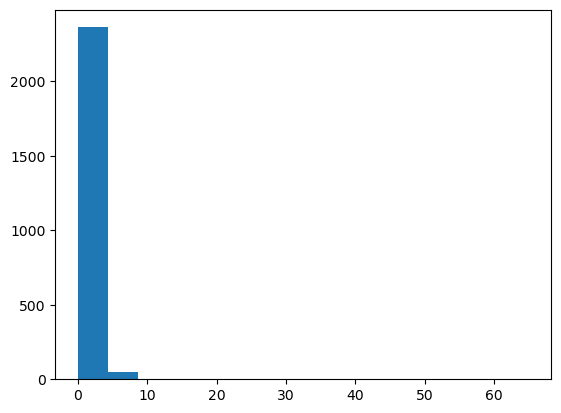

In [143]:
print(plt.hist(household_var.number_adults_r4, range=[0,65], bins=15)) # cap outlier? or set missing?

# Information Variables

missing values only in round 2 of main_info_source_r2. So backwardfill should work fine.

In [144]:
info_var = df[["id", "s17q3_r2", "s17q3_r3", "s17q3_r4"]]
info_var = info_var.rename(columns={"s17q3_r2": "main_info_source_r2", "s17q3_r3": "main_info_source_r3", "s17q3_r4": "main_info_source_r4"})

In [145]:
check_categories(info_var)

Variable: id
Min: 1
Max: 2416
Mean: 1208.5
Std: 697.5834478158629
Number of Missing Values: 0


Variable: main_info_source_r2

Value counts for 'main_info_source_r2':
main_info_source_r2
NaN                                                                                                                               613
insurance extension staff (including VIPs/Insurance promoters)                                                                    527
enumerators                                                                                                                       443
community meetings                                                                                                                286
neighbors, friends and relatives in informal groups                                                                               233
Oromia Insurance Company staff (OIC) excluding VIPs/insurance promoters and/or Oromia Saving and Credits Share Company (WALQO)     83
survey co

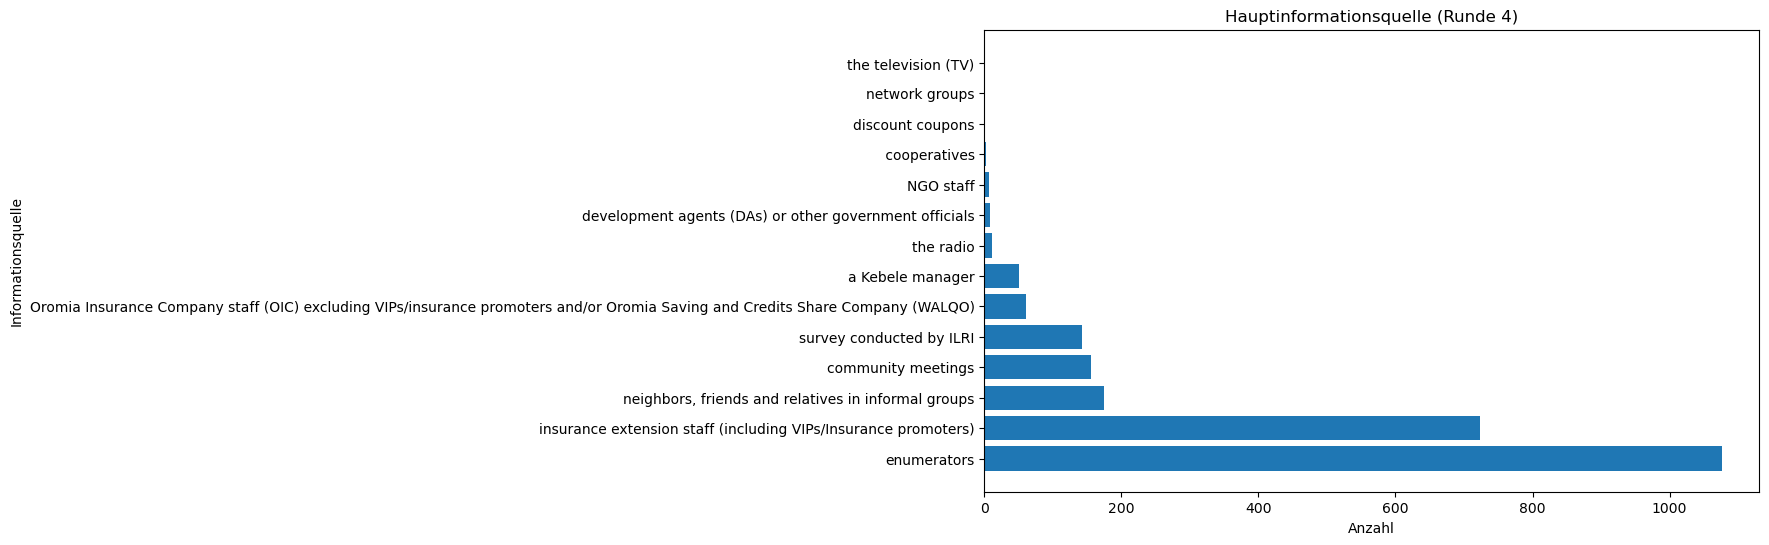

In [146]:
counts = info_var['main_info_source_r3'].value_counts(dropna=False)

plt.figure(figsize=(10, 6))
plt.barh(counts.index.astype(str), counts.values)
plt.xlabel("Anzahl")
plt.ylabel("Informationsquelle")
plt.title("Hauptinformationsquelle (Runde 4)")
plt.show()


# Insurance Variables

--> advise_vip_r2 and advise_vip_r3 completely missing, probably because the advise treatment was introduced only later

- number of missings is high in ALL rounds for relationship_vip_r4 --> remove variable?

In [147]:
insurance_vars = df[["id", "s18q4_n1_r2", "s18q5_n1_r2", "s19q1_r2", "s19q9_r2", "s19q16_r2", "s1913_2_r2",
                           "s18q4_n1_r3", "s18q5_n1_r3", "s19q1_r3", "s19q9_r3", "s19q16_r3", "s1913_2_r3", 
                           "s18q4_n1_r4", "s18q5_n1_r4", "s19q1_r4", "s19q9_r4", "s19q16_r4", "s1913_2_r4"]]

insurance_vars = insurance_vars.rename(columns={"s18q4_n1_r2" : "purchase_bin_r2", "s18q5_n1_r2" : "why_not_purchase_r2", "s19q1_r2" : "know_vip_r2", "s19q9_r2" : "relationship_vip_r2", "s19q16_r2" : "trust_vip_r2", "s1913_2_r2" : "advise_vip_r2",
                                                "s18q4_n1_r3" : "purchase_bin_r3", "s18q5_n1_r3" : "why_not_purchase_r3", "s19q1_r3" : "know_vip_r3", "s19q9_r3" : "relationship_vip_r3", "s19q16_r3" : "trust_vip_r3", "s1913_2_r3" : "advise_vip_r3", 
                                                "s18q4_n1_r4" : "purchase_bin_r4", "s18q5_n1_r4" : "why_not_purchase_r4", "s19q1_r4" : "know_vip_r4", "s19q9_r4" : "relationship_vip_r4", "s19q16_r4" : "trust_vip_r4", "s1913_2_r4" : "advise_vip_r4"})
insurance_vars

,id,purchase_bin_r2,why_not_purchase_r2,know_vip_r2,relationship_vip_r2,trust_vip_r2,advise_vip_r2,purchase_bin_r3,why_not_purchase_r3,know_vip_r3,relationship_vip_r3,trust_vip_r3,advise_vip_r3,purchase_bin_r4,why_not_purchase_r4,know_vip_r4,relationship_vip_r4,trust_vip_r4,advise_vip_r4
0,1,No,Did not understand insurance well enough,No,NaN,Yes,NaN,No,Did not understand insurance well enough,Yes,Close friend,Yes,NaN,No,Did not understand insurance well enough,Yes,NaN,Yes,Yes
1,2,No,Did not know who the agent was or could not fi...,No,NaN,Yes,NaN,No,Unaware/Have not heard that insurance was avai...,Yes,NaN,Yes,NaN,No,Did not have enough animals,Yes,NaN,Yes,Yes
2,3,No,Did not understand insurance well enough,Yes,NaN,Yes,NaN,No,Did not have enough animals,Yes,sub-clan member,No,NaN,No,Cost is too high,Yes,NaN,Yes,Yes
3,4,No,Did not understand insurance well enough,Yes,NaN,Yes,NaN,No,Did not understand coupon,Yes,NaN,Yes,NaN,No,Did not have enough animals,Yes,Other,Yes,Yes
4,5,No,Did not understand insurance well enough,Yes,NaN,Yes,NaN,No,Did not understand insurance well enough,Yes,NaN,Yes,NaN,No,Did not understand insurance well enough,Yes,NaN,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2412,No,Unaware/Have not heard that insurance was avai...,Yes,Close friend,Yes,NaN,No,Too expensive/could not afford,Yes,NaN,Yes,NaN,No,Too busy,Yes,NaN,Yes,No
2412,2413,Yes,NaN,Yes,family member,Yes,NaN,Yes,NaN,Yes,family member,Yes,NaN,No,Did not know who the agent was or could not fi...,Yes,Other,Yes,Yes
2413,2414,No,Unaware/Have not heard that insurance was avai...,Yes,NaN,Yes,NaN,No,Too expensive/could not afford,Yes,NaN,Yes,NaN,No,Did not know who the agent was or could not fi...,Yes,NaN,Yes,Yes
2414,2415,No,Waiting to see what happens to other people wi...,Yes,NaN,Yes,NaN,Yes,NaN,Yes,NaN,No,NaN,No,Did not understand insurance well enough,Yes,NaN,Yes,No


In [148]:
# In some variables, a missing values is created due to the design of the questions and their filtering --> correct those missing values
insurance_vars["why_not_purchase_r2"] = np.where(insurance_vars['purchase_bin_r2']=="Yes", "BOUGHT INSURANCE", insurance_vars["why_not_purchase_r2"]) 
insurance_vars["why_not_purchase_r3"] = np.where(insurance_vars['purchase_bin_r3']=="Yes", "BOUGHT INSURANCE", insurance_vars["why_not_purchase_r3"])
insurance_vars["why_not_purchase_r4"] = np.where(insurance_vars['purchase_bin_r4']=="Yes", "BOUGHT INSURANCE", insurance_vars["why_not_purchase_r4"]) 

insurance_vars["relationship_vip_r2"] = np.where(insurance_vars['know_vip_r2']=="No", "DIDNT KNOW VIP", insurance_vars["relationship_vip_r2"]) 
insurance_vars["relationship_vip_r3"] = np.where(insurance_vars['know_vip_r3']=="No", "DIDNT KNOW VIP", insurance_vars["relationship_vip_r3"]) 
insurance_vars["relationship_vip_r4"] = np.where(insurance_vars['know_vip_r4']=="No", "DIDNT KNOW VIP", insurance_vars["relationship_vip_r4"]) 

insurance_vars["advise_vip_r2"] = 'No'
insurance_vars["advise_vip_r3"] = 'No'

**build broader categories for why_not_purchase_rX** ?

In [149]:
# check distribution and for consistency
check_categories(insurance_vars)

Variable: id
Min: 1
Max: 2416
Mean: 1208.5
Std: 697.5834478158629
Number of Missing Values: 0


Variable: purchase_bin_r2

Value counts for 'purchase_bin_r2':
purchase_bin_r2
No     2227
Yes     189
Name: count, dtype: int64
Number of Missing Values: 0


Variable: why_not_purchase_r2

Value counts for 'why_not_purchase_r2':
why_not_purchase_r2
Unaware/Have not heard that insurance was available           792
Did not understand insurance well enough                      504
Did not know who the agent was or could not find them         246
Did not have enough animals                                   206
BOUGHT INSURANCE                                              189
Too expensive/could not afford                                 82
Did not trust the insurance agent or company                   71
Waiting to see what happens to other people with insurance     64
Afraid of uncertainty in insurance                             62
Did not want product/product not good for me                

In [204]:
#test = insurance_vars[insurance_vars['relationship_vip_r2'].isna()] # too many unexplainable missings
#test
insurance_vars['relationship_vip_r2'].isna().sum()

1673

# Move Variables 

--> no missings

In [151]:
move_vars = df[["id", "s5_q2_r2", "s5_q2_r3", "s5_q2_r4"]]
move_vars = move_vars.rename(columns={"s5_q2_r2": "household_moved_r2", "s5_q2_r3": "household_moved_r3", "s5_q2_r4": "household_moved_r4"})
check_categories(move_vars)

Variable: id
Min: 1
Max: 2416
Mean: 1208.5
Std: 697.5834478158629
Number of Missing Values: 0


Variable: household_moved_r2

Value counts for 'household_moved_r2':
household_moved_r2
No     1966
Yes     450
Name: count, dtype: int64
Number of Missing Values: 0


Variable: household_moved_r3

Value counts for 'household_moved_r3':
household_moved_r3
No     2157
Yes     259
Name: count, dtype: int64
Number of Missing Values: 0


Variable: household_moved_r4

Value counts for 'household_moved_r4':
household_moved_r4
No     2280
Yes     136
Name: count, dtype: int64
Number of Missing Values: 0




# Phone Variables

--> almost noone has (provided) a phone number (in r2, only 8 do) --> if phone should at all be included, then perhaps a variable that indicates whether household owns a phone 

In [152]:
phone_vars = df[["id", "s4_q1_r2", "s4_q1_0_r2", "s4_q1_1_r2", "s4_q2_r2", "s4_q2_1_r2", "s4_q3_r2", 
                 "s4_q1_r3", "s4_q1_0_r3", "s4_q1_1_r3", "s4_q2_r3", "s4_q2_1_r3", "s4_q3_r3",
                 "s4_q1_r4", "s4_q1_0_r4", "s4_q1_1_r4", "s4_q2_r4", "s4_q2_1_r4", "s4_q3_r4"]]
phone_vars = phone_vars.rename(columns={"s4_q1_r2" : "num_rec_r2", "s4_q1_0_r2" : "num_rec_correct_r2", "s4_q1_1_r2" : "best_contact_r2", "s4_q2_r2" : "no_phone_before_r2", "s4_q2_1_r2" : "if_yes_number_r2", "s4_q3_r2" : "phone_users_house_r2", 
                                        "s4_q1_r3" : "num_rec_r3", "s4_q1_0_r3" : "num_rec_correct_r3", "s4_q1_1_r3" : "best_contact_r3", "s4_q2_r3" : "no_phone_before_r3", "s4_q2_1_r3" : "if_yes_number_r3", "s4_q3_r3" : "phone_users_house_r3",
                                        "s4_q1_r4" : "num_rec_r4", "s4_q1_0_r4" : "num_rec_correct_r4", "s4_q1_1_r4" : "best_contact_r4", "s4_q2_r4" : "no_phone_before_r4", "s4_q2_1_r4" : "if_yes_number_r4", "s4_q3_r4" : "phone_users_house_r4"})
phone_vars

,id,num_rec_r2,num_rec_correct_r2,best_contact_r2,no_phone_before_r2,if_yes_number_r2,phone_users_house_r2,num_rec_r3,num_rec_correct_r3,best_contact_r3,no_phone_before_r3,if_yes_number_r3,phone_users_house_r3,num_rec_r4,num_rec_correct_r4,best_contact_r4,no_phone_before_r4,if_yes_number_r4,phone_users_house_r4
0,1,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No
1,2,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,No
2,3,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No
3,4,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No
4,5,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2412,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,No
2412,2413,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No
2413,2414,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No,NaN,Yes,NaN,NaN,NaN,No
2414,2415,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,Yes,NaN,Yes,NaN,NaN,NaN,No


In [153]:
phone_vars.phone_users_house_r4.value_counts()
phone_vars.num_rec_r3.isna().sum()

#pd.crosstab(phone_vars.num_rec_r2, phone_vars.num_rec_correct_r2)

phone_vars['owns_phone_r2'] = np.where((phone_vars['num_rec_r2'].notna())|  (phone_vars['phone_users_house_r2']=='Yes') | (phone_vars['best_contact_r2'].notna() ), 1, 0)
phone_vars['owns_phone_r3'] = np.where((phone_vars['num_rec_r3'].notna()) | (phone_vars['phone_users_house_r3']=='Yes') | (phone_vars['best_contact_r3'].notna() ), 1, 0)
phone_vars['owns_phone_r4'] = np.where((phone_vars['num_rec_r4'].notna()) | (phone_vars['phone_users_house_r4']=='Yes') | (phone_vars['best_contact_r4'].notna() ), 1, 0)

phone_vars.owns_phone_r4.value_counts()

owns_phone_r4
0    1909
1     507
Name: count, dtype: int64

In [ ]:
phone_vars.owns_phone_r2.isna().sum() # 0 missings

0

# Religion Variables

--> only 88 respondents change religion across waves --> constant?

In [154]:
religion_vars = df[["id", "s5_q1_r2", "s5_q1_0_r2", "s5_q1_1_r2", "s5_q1_r3", "s5_q1_0_r3", "s5_q1_1_r3", "s5_q1_r4", "s5_q1_0_r4", "s5_q1_1_r4"]] # rec_rel_other_rX all missing, not used
religion_vars = religion_vars.rename(columns={"s5_q1_r2" : "rec_rel_r2", "s5_q1_0_r2" : "rec_rel_cor_r2", "s5_q1_1_r2" : "rec_rel_upd_r2", "s5_q1_1oth_r2": "rec_rel_other_r2",
                                              "s5_q1_r3" : "rec_rel_r3", "s5_q1_0_r3" : "rec_rel_cor_r3", "s5_q1_1_r3" : "rec_rel_upd_r3", "s5_q1_1oth_r3": "rec_rel_other_r3", 
                                              "s5_q1_r4" : "rec_rel_r4", "s5_q1_0_r4" : "rec_rel_cor_r4", "s5_q1_1_r4" : "rec_rel_upd_r4", "s5_q1_1oth_r4" : "rec_rel_other_r4"})
religion_vars

,id,rec_rel_r2,rec_rel_cor_r2,rec_rel_upd_r2,rec_rel_r3,rec_rel_cor_r3,rec_rel_upd_r3,rec_rel_r4,rec_rel_cor_r4,rec_rel_upd_r4
0,1,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN
1,2,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN
2,3,Protestant,Yes,NaN,Protestant,Yes,NaN,Protestant,Yes,NaN
3,4,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN
4,5,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...
2411,2412,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN
2412,2413,Protestant,Yes,NaN,Protestant,Yes,NaN,Protestant,Yes,NaN
2413,2414,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN
2414,2415,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN,Traditional/Wakefata,Yes,NaN


In [72]:
check_categories(religion_vars)

Variable: id
Min: 1
Max: 2416
Mean: 1208.5
Std: 697.5834478158629
Number of Missing Values: 0


Variable: rec_rel_r2

Value counts for 'rec_rel_r2':
rec_rel_r2
Traditional/Wakefata    1590
Muslim                   555
Protestant               235
Orthodox                  15
Catholic                  10
NaN                        7
Other Christian            4
Name: count, dtype: int64
Number of Missing Values: 7


Variable: rec_rel_cor_r2

Value counts for 'rec_rel_cor_r2':
rec_rel_cor_r2
Yes    2306
No      110
Name: count, dtype: int64
Number of Missing Values: 0


Variable: rec_rel_upd_r2

Value counts for 'rec_rel_upd_r2':
rec_rel_upd_r2
NaN                     2306
Traditional/Wakefata      61
Protestant                25
Muslim                    22
Other Christian            1
Orthodox                   1
Name: count, dtype: int64
Number of Missing Values: 2306


Variable: rec_rel_other_r2
Min: nan
Max: nan
Mean: nan
Std: nan
Number of Missing Values: 2416


Variable: rec_rel_r

In [155]:
# create updated religion per wave
religion_vars['religion_r2'] = np.where((religion_vars['rec_rel_r2'].notna()) &  (religion_vars['rec_rel_cor_r2']=='Yes'), religion_vars["rec_rel_r2"], religion_vars["rec_rel_upd_r2"])
religion_vars['religion_r3'] = np.where((religion_vars['rec_rel_r3'].notna()) &  (religion_vars['rec_rel_cor_r3']=='Yes'), religion_vars["rec_rel_r3"], religion_vars["rec_rel_upd_r3"])
religion_vars['religion_r4'] = np.where((religion_vars['rec_rel_r4'].notna()) &  (religion_vars['rec_rel_cor_r4']=='Yes'), religion_vars["rec_rel_r4"], religion_vars["rec_rel_upd_r4"])

religion_vars['religion_change'] = np.where((religion_vars['religion_r2'] ==religion_vars['religion_r3']) & (religion_vars['religion_r3'] == religion_vars['religion_r4']), 0, 1)

religion_vars.head()
religion_vars.religion_change.value_counts()

religion_change
0    2328
1      88
Name: count, dtype: int64

In [87]:
religion_vars.religion_r4.isna().sum() # 5 per wave

5

# Other Variables (that dont need renaming)

In [156]:
df

,hhid_r4,id,buy_nr_cattle_r4,buy_cattle_r4,buy_nr_goat_r4,buy_goat_r4,n_previd_cattle_r4,n_previd_goat_r4,cs_cs_diff_post_cattle_r4,cs_cs_ratio_post_cattle_r4,...,s19q16_r2,s1913_2_r2,hhid,eng_language,amh_language,afm_language,agric_land,irrigated_land,expend,risky
0,1012410003,1,0,Not buy,0,Not buy,2,10,-188.170624,0.0,...,Yes,NaN,1.012410e+09,No,No,No,Yes,2.0,0.0,70.0
1,1012420005,2,0,Not buy,0,Not buy,2,10,-850.367249,0.0,...,Yes,NaN,1.012420e+09,No,No,Yes,Yes,0.0,0.0,20.0
2,1012420006,3,0,Not buy,0,Not buy,10,15,-5219.686523,0.0,...,Yes,NaN,1.012420e+09,No,No,Yes,No,NaN,1.0,22.0
3,1012420008,4,0,Not buy,0,Not buy,2,5,-157.544266,0.0,...,Yes,NaN,1.012420e+09,No,No,No,Yes,0.0,0.0,33.0
4,1012420021,5,0,Not buy,0,Not buy,0,12,NaN,NaN,...,Yes,NaN,1.012420e+09,No,No,No,Yes,2.0,1.0,34.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,4310801003,2412,0,Not buy,0,Not buy,0,3,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2412,4310801004,2413,0,Not buy,0,Not buy,1,3,0.000000,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2413,4310801005,2414,0,Not buy,0,Not buy,0,7,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2414,4310801006,2415,0,Not buy,0,Not buy,0,2,NaN,NaN,...,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [157]:
other_vars = df[["id", "expend", "buy_goat_r4", "buy_cattle_r4", "buy_cattle_r3", "buy_goat_r3", "buy_cattle_r2", "buy_goat_r2", "risky", 
                 "buy_nr_cattle_r4", "buy_nr_goat_r4", "buy_nr_cattle_r3", "buy_nr_goat_r3", "buy_nr_cattle_r2", "buy_nr_goat_r2",
                 "irrigated_land", "agric_land", "eng_language", "amh_language", "afm_language", 
                 "n_previd_cattle_r4", "n_previd_cattle_r2", "n_previd_cattle_r3", "n_previd_goat_r2", "n_previd_goat_r4", "n_previd_goat_r3",
                 "cs_cs_diff_post_cattle_r4", "cs_cs_ratio_post_cattle_r4", "cs_cs_diff_post_goat_r4", "cs_cs_ratio_post_goat_r4" , "cs_cs_diff_post_cattle_r3", "cs_cs_ratio_post_cattle_r3", 
                 "cs_cs_diff_post_goat_r3", "cs_cs_ratio_post_goat_r3", "cs_cs_diff_post_cattle_r2", "cs_cs_ratio_post_cattle_r2", "cs_cs_diff_post_goat_r2", "cs_cs_ratio_post_goat_r2"]] #  "hhid_r4", "hhid_r3", "hhid_r2", "hhid", round_r4	round_r3	round_r2
other_vars

,id,expend,buy_goat_r4,buy_cattle_r4,buy_cattle_r3,buy_goat_r3,buy_cattle_r2,buy_goat_r2,risky,buy_nr_cattle_r4,...,cs_cs_diff_post_goat_r4,cs_cs_ratio_post_goat_r4,cs_cs_diff_post_cattle_r3,cs_cs_ratio_post_cattle_r3,cs_cs_diff_post_goat_r3,cs_cs_ratio_post_goat_r3,cs_cs_diff_post_cattle_r2,cs_cs_ratio_post_cattle_r2,cs_cs_diff_post_goat_r2,cs_cs_ratio_post_goat_r2
0,1,0.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,70.0,0,...,-120.671875,0.0,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN
1,2,0.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,20.0,0,...,-758.621033,0.0,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN
2,3,1.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,22.0,0,...,-1180.266846,0.0,0.000000,NaN,0.000000,NaN,-61.014305,0.0,0.0,NaN
3,4,0.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,33.0,0,...,-53.165897,0.0,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN
4,5,1.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,34.0,0,...,-513.432312,0.0,0.000000,NaN,0.000000,NaN,0.000000,NaN,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2412,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,0.000000,NaN,-1096.288208,0.0,-224.066605,0.0,0.000000,NaN,0.0,NaN
2412,2413,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,0.000000,NaN,-100.136703,0.0,-124.149330,0.0,0.000000,NaN,0.0,NaN
2413,2414,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,-416.300049,0.0,-726.989807,0.0,-95.092560,0.0,0.000000,NaN,0.0,NaN
2414,2415,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,-172.883148,0.0,-602.607239,0.0,-160.766830,0.0,0.000000,NaN,0.0,NaN


# Merge topics and transform into long format

In [158]:
household_var.columns

Index(['id', 'household_description_r2', 'number_adults_r2',
       'household_description_r3', 'number_adults_r3',
       'household_description_r4', 'number_adults_r4'],
      dtype='object')

In [159]:
age_vars2 = age_vars[['id','age_constant']]
children_vars2 = children_vars
chip_vars2 = chip_vars
educ_vars2 = educ_vars # needs manipulation!
household_var2 = household_var
info_var2 = info_var
insurance_vars2 = insurance_vars # needs selection
move_vars2 = move_vars
phone_vars2 = phone_vars[['id', 'owns_phone_r2', 'owns_phone_r3', 'owns_phone_r4']]
religion_vars2 = religion_vars[['id', 'religion_r2', 'religion_r3', 'religion_r4']]

In [160]:
dfs = [other_vars, children_vars2, chip_vars2,educ_vars2, household_var2, info_var2, insurance_vars2, move_vars2, phone_vars2, religion_vars2, age_vars2] 

merged_df = dfs[0]
for df in dfs[1:]:
    merged_df = pd.merge(merged_df, df, on='id', how='outer')

merged_df

,id,expend,buy_goat_r4,buy_cattle_r4,buy_cattle_r3,buy_goat_r3,buy_cattle_r2,buy_goat_r2,risky,buy_nr_cattle_r4,...,household_moved_r2,household_moved_r3,household_moved_r4,owns_phone_r2,owns_phone_r3,owns_phone_r4,religion_r2,religion_r3,religion_r4,age_constant
0,1,0.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,70.0,0,...,No,No,No,1,0,0,Traditional/Wakefata,Traditional/Wakefata,Traditional/Wakefata,25.0
1,2,0.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,20.0,0,...,No,No,No,0,1,0,Traditional/Wakefata,Traditional/Wakefata,Traditional/Wakefata,27.0
2,3,1.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,22.0,0,...,No,No,No,1,0,0,Protestant,Protestant,Protestant,29.0
3,4,0.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,33.0,0,...,No,No,No,0,0,0,Traditional/Wakefata,Traditional/Wakefata,Traditional/Wakefata,35.0
4,5,1.0,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,34.0,0,...,No,No,No,0,0,0,Traditional/Wakefata,Traditional/Wakefata,Traditional/Wakefata,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,2412,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,No,No,No,1,1,0,Traditional/Wakefata,Traditional/Wakefata,Traditional/Wakefata,46.0
2412,2413,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,No,No,No,1,0,0,Protestant,Protestant,Protestant,45.0
2413,2414,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,No,No,No,0,0,0,Traditional/Wakefata,Traditional/Wakefata,Traditional/Wakefata,38.0
2414,2415,NaN,Not buy,Not buy,Not buy,Not buy,Not buy,Not buy,NaN,0,...,No,Yes,No,1,1,0,Traditional/Wakefata,Traditional/Wakefata,Traditional/Wakefata,56.0


In [162]:
for i in merged_df:
    print(i)

id
expend
buy_goat_r4
buy_cattle_r4
buy_cattle_r3
buy_goat_r3
buy_cattle_r2
buy_goat_r2
risky
buy_nr_cattle_r4
buy_nr_goat_r4
buy_nr_cattle_r3
buy_nr_goat_r3
buy_nr_cattle_r2
buy_nr_goat_r2
irrigated_land
agric_land
eng_language
amh_language
afm_language
n_previd_cattle_r4
n_previd_cattle_r2
n_previd_cattle_r3
n_previd_goat_r2
n_previd_goat_r4
n_previd_goat_r3
cs_cs_diff_post_cattle_r4
cs_cs_ratio_post_cattle_r4
cs_cs_diff_post_goat_r4
cs_cs_ratio_post_goat_r4
cs_cs_diff_post_cattle_r3
cs_cs_ratio_post_cattle_r3
cs_cs_diff_post_goat_r3
cs_cs_ratio_post_goat_r3
cs_cs_diff_post_cattle_r2
cs_cs_ratio_post_cattle_r2
cs_cs_diff_post_goat_r2
cs_cs_ratio_post_goat_r2
number_minors_r4
educ_child_r4
activity_child_r4
number_minors_r3
educ_child_r3
activity_child_r3
number_minors_r2
educ_child_r2
activity_child_r2
chips_kalo_farm_land_r2
chips_alcohol_r2
chips_chew_khat_r2
chips_water_source_r2
chips_sell_livestock_investment_r2
chips_migration_conflict_r2
chips_overnight_r2
chips_kalo_farm_land

In [163]:
test = pd.wide_to_long(
    merged_df,
    stubnames=["buy_cattle", "buy_goat", "buy_nr_cattle", "buy_nr_goat", "n_previd_cattle", "n_previd_goat",
               "cs_cs_diff_post_cattle", "cs_cs_ratio_post_cattle", "cs_cs_diff_post_goat", "cs_cs_ratio_post_goat",
               "number_minors", "educ_child",  "activity_child", #"reason_not_in_school_child",
               "chips_kalo_farm_land", "chips_alcohol", "chips_chew_khat", "chips_water_source", "chips_sell_livestock_investment", "chips_migration_conflict", "chips_overnight",
               "highest_educ", "highest_educ_correct", "highest_educ_updated", "highest_educ_updated_other", "household_description", "number_adults", "main_info_source",
               "religion", "owns_phone", "household_moved", "purchase_bin", "why_not_purchase", "know_vip", "relationship_vip", "trust_vip", "advise_vip"],
    i="id",
    j="wave",
    sep="_r"
).reset_index()

test

,id,wave,afm_language,age_constant,agric_land,amh_language,eng_language,expend,irrigated_land,risky,...,main_info_source,religion,owns_phone,household_moved,purchase_bin,why_not_purchase,know_vip,relationship_vip,trust_vip,advise_vip
0,1,4,No,25.0,Yes,No,No,0.0,2.0,70.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,NaN,Yes,Yes
1,2,4,Yes,27.0,Yes,No,No,0.0,0.0,20.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,NaN,Yes,Yes
2,3,4,Yes,29.0,No,No,No,1.0,NaN,22.0,...,insurance extension staff (including VIPs/Insu...,Protestant,0,No,No,Cost is too high,Yes,NaN,Yes,Yes
3,4,4,No,35.0,Yes,No,No,0.0,0.0,33.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,Other,Yes,Yes
4,5,4,No,36.0,Yes,No,No,1.0,2.0,34.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,NaN,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,2412,2,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,...,"neighbors, friends and relatives in informal g...",Traditional/Wakefata,1,No,No,Unaware/Have not heard that insurance was avai...,Yes,Close friend,Yes,No
7244,2413,2,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Oromia Insurance Company staff (OIC) excluding...,Protestant,1,No,Yes,BOUGHT INSURANCE,Yes,family member,Yes,No
7245,2414,2,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,...,insurance extension staff (including VIPs/Insu...,Traditional/Wakefata,0,No,No,Unaware/Have not heard that insurance was avai...,Yes,NaN,Yes,No
7246,2415,2,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Oromia Insurance Company staff (OIC) excluding...,Traditional/Wakefata,1,No,No,Waiting to see what happens to other people wi...,Yes,NaN,Yes,No


In [164]:
test.columns

Index(['id', 'wave', 'afm_language', 'age_constant', 'agric_land',
       'amh_language', 'eng_language', 'expend', 'irrigated_land', 'risky',
       'buy_cattle', 'buy_goat', 'buy_nr_cattle', 'buy_nr_goat',
       'n_previd_cattle', 'n_previd_goat', 'cs_cs_diff_post_cattle',
       'cs_cs_ratio_post_cattle', 'cs_cs_diff_post_goat',
       'cs_cs_ratio_post_goat', 'number_minors', 'educ_child',
       'activity_child', 'chips_kalo_farm_land', 'chips_alcohol',
       'chips_chew_khat', 'chips_water_source',
       'chips_sell_livestock_investment', 'chips_migration_conflict',
       'chips_overnight', 'highest_educ', 'highest_educ_correct',
       'highest_educ_updated', 'highest_educ_updated_othe',
       'household_description', 'number_adults', 'main_info_source',
       'religion', 'owns_phone', 'household_moved', 'purchase_bin',
       'why_not_purchase', 'know_vip', 'relationship_vip', 'trust_vip',
       'advise_vip'],
      dtype='object')

# Notes

1. Difference buy_cattle / buy_goat and purchase_insurance


# To Do

- Not sure if activity_child AND reason_not_in_school are both necessary of if overlap is too big..
- make sense of education variables
- handle missings: ffil / bfil

# Change of IBLI Purchase and Welfare Across Waves

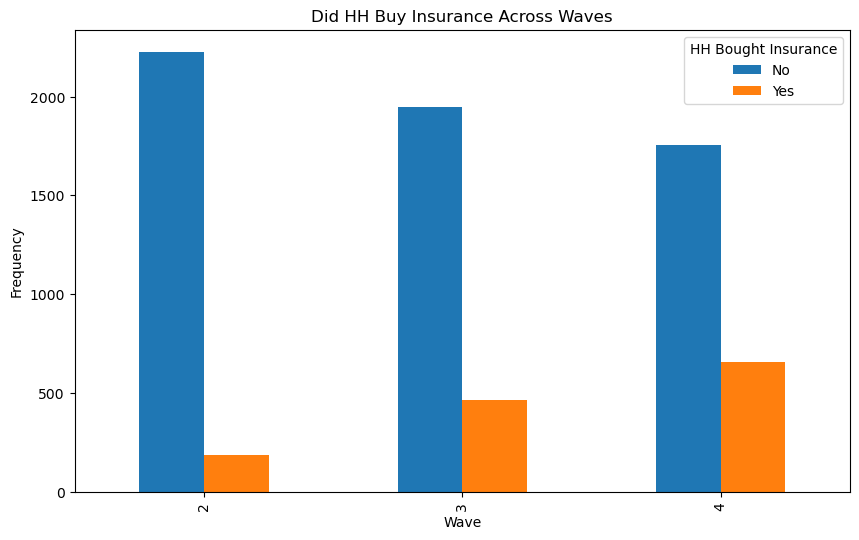

In [165]:
counts = pd.crosstab(test['wave'], test['purchase_bin'], dropna=False)

counts.plot(kind='bar', figsize=(10, 6))
plt.xlabel("Wave")
plt.ylabel("Frequency")
plt.title("Did HH Buy Insurance Across Waves")
plt.legend(title="HH Bought Insurance")
plt.show()


In [102]:
merged_df["change_in_takeup"] = np.where(((merged_df['purchase_bin_r2']=="Yes" )& (merged_df['purchase_bin_r3']=="Yes") & (merged_df['purchase_bin_r4']=="Yes")) | 
                                         ((merged_df['purchase_bin_r2']=="No" ) & (merged_df['purchase_bin_r3']=="No") & (merged_df['purchase_bin_r4']=="No") ), 1 ,0)

merged_df["change_in_takeup"].value_counts()#[1]

print("Number of households which either ALWAYS or NEVER buy IBLI:", merged_df["change_in_takeup"].value_counts()[1], "--> roughly 60% of the sample NEVER BUYS")
print("Number of households which either take up IBLI or stop at least once:", merged_df["change_in_takeup"].value_counts()[0])

Number of households which either ALWAYS or NEVER buy IBLI: 1489 --> roughly 60% of the sample NEVER BUYS
Number of households which either take up IBLI or stop at least once: 927


In [103]:
cols = ['purchase_bin_r2', 'purchase_bin_r3', 'purchase_bin_r4']
merged_df['takeup_pattern'] = merged_df[cols].replace({1: "Yes", 0: "No"}).agg('-'.join, axis=1)
print(merged_df['takeup_pattern'].value_counts())

takeup_pattern
No-No-No       1438
No-No-Yes       404
No-Yes-No       226
No-Yes-Yes      159
Yes-No-No        63
Yes-Yes-Yes      51
Yes-No-Yes       45
Yes-Yes-No       30
Name: count, dtype: int64


In [104]:
cols = ['buy_cattle_r2', 'buy_cattle_r3', 'buy_cattle_r4']
merged_df['takeup_pattern'] = merged_df[cols].replace({1: "Yes", 0: "No"}).agg('-'.join, axis=1)
print(merged_df['takeup_pattern'].value_counts())

takeup_pattern
Not buy-Not buy-Not buy    1787
Not buy-Buy-Not buy         420
Buy-Buy-Buy                 112
Buy-Not buy-Buy              82
Buy-Buy-Not buy              12
Buy-Not buy-Not buy           2
Not buy-Not buy-Buy           1
Name: count, dtype: int64


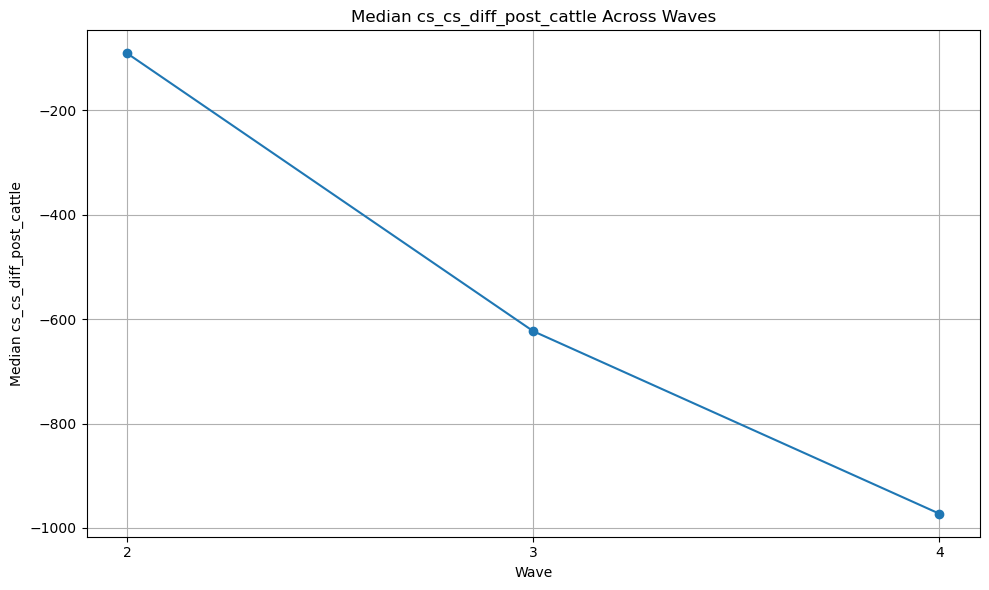

In [105]:
means = test.groupby('wave')['cs_cs_diff_post_cattle'].mean()

plt.figure(figsize=(10, 6))
plt.plot(means.index.astype(str), means.values, marker='o', linestyle='-')

plt.xlabel("Wave")
plt.ylabel("Median cs_cs_diff_post_cattle")
plt.title("Median cs_cs_diff_post_cattle Across Waves")
plt.grid(True)
plt.tight_layout()
plt.show()

In [170]:
#test.to_excel("dflong2.xlsx")
df_long = test

In [107]:
no_miss_cattle1 = df_long[df_long['cs_cs_diff_post_cattle'].notna()]
no_miss_cattle1 = df_long[df_long['cs_cs_ratio_post_cattle'].notna()]

no_miss_cattle1

no_miss_cattle1.wave.value_counts()

wave
3    1878
4    1514
2     800
Name: count, dtype: int64

In [108]:
pd.crosstab(no_miss_cattle1.wave, no_miss_cattle1.buy_cattle)

buy_cattle,Buy,Not buy
wave,,
2,74,726
3,328,1550
4,117,1397


In [77]:
no_miss_cattle1.groupby('buy_cattle')['cs_cs_ratio_post_cattle'].mean()
no_miss_cattle1.groupby('buy_cattle')['cs_cs_ratio_post_cattle'].max()


buy_cattle
Buy        1.0
Not buy    0.0
Name: cs_cs_ratio_post_cattle, dtype: float64

In [74]:
xx = df_long[(df_long['cs_cs_ratio_post_cattle'].notna()) & (df_long['buy_cattle'] == 'Not buy')][['wave', 'buy_cattle', 'cs_cs_ratio_post_cattle', 'cs_cs_diff_post_cattle']]
xx

,wave,buy_cattle,cs_cs_ratio_post_cattle,cs_cs_diff_post_cattle
0,4,Not buy,0.0,-188.170624
1,4,Not buy,0.0,-850.367249
2,4,Not buy,0.0,-5219.686523
3,4,Not buy,0.0,-157.544266
5,4,Not buy,0.0,-158.881271
...,...,...,...,...
7234,2,Not buy,0.0,-123.495956
7236,2,Not buy,0.0,-689.439941
7237,2,Not buy,0.0,-174.333359
7239,2,Not buy,0.0,-125.556511


In [75]:
x = df_long[(df_long['cs_cs_ratio_post_cattle'].isna()) & (df_long['buy_cattle'] == 'Not buy')][['wave', 'buy_cattle', 'cs_cs_ratio_post_cattle', 'cs_cs_diff_post_cattle']]
x

,wave,buy_cattle,cs_cs_ratio_post_cattle,cs_cs_diff_post_cattle
4,4,Not buy,NaN,NaN
10,4,Not buy,NaN,NaN
16,4,Not buy,NaN,NaN
17,4,Not buy,NaN,NaN
20,4,Not buy,NaN,NaN
...,...,...,...,...
7243,2,Not buy,NaN,0.0
7244,2,Not buy,NaN,0.0
7245,2,Not buy,NaN,0.0
7246,2,Not buy,NaN,0.0


# Investigate Outcome Transformations

In [171]:
def plot_transformations(y, title_prefix="OUTCOME"):
    """
    Apply and plot several transformations of the input variable y.

    Args:
        y (pd.Series or np.array): The variable to transform and plot.
        title_prefix (str): Prefix for printed and plot titles.
    """
    # Define transformations to try
    transformations = {
        'Cubic Root': lambda x: np.cbrt(x),
        'Log1p (-X)': lambda x: np.log1p(-x),
        'Square Root (-X)': lambda x: np.sqrt(-x),
        'Yeo-Johnson': lambda x: stats.yeojohnson(x.dropna())[0]
    }

    fig, axes = plt.subplots(nrows=1, ncols=len(transformations), figsize=(5 * len(transformations), 4))

    # Add the overall title
    fig.suptitle(f"Transformations of {title_prefix}", fontsize=16, y=1.05)

    for ax, (name, func) in zip(axes, transformations.items()):
        try:
            transformed = func(y)

            # Drop NaNs and infs just in case - makes code more stable
            transformed = transformed[np.isfinite(transformed)]

            ax.hist(transformed, bins=20)
            ax.set_title(name)

            # Automatically adjust x-axis based on the transformed data
            ax.set_xlim(transformed.min(), transformed.max())

        except Exception as e:
            ax.set_title(f"{name}\n(Failed)")
            ax.axis('off')  # Hide the plot if transformation fails

    plt.tight_layout()
    plt.subplots_adjust(top=0.8)  # Make space for the overall title
    plt.show()


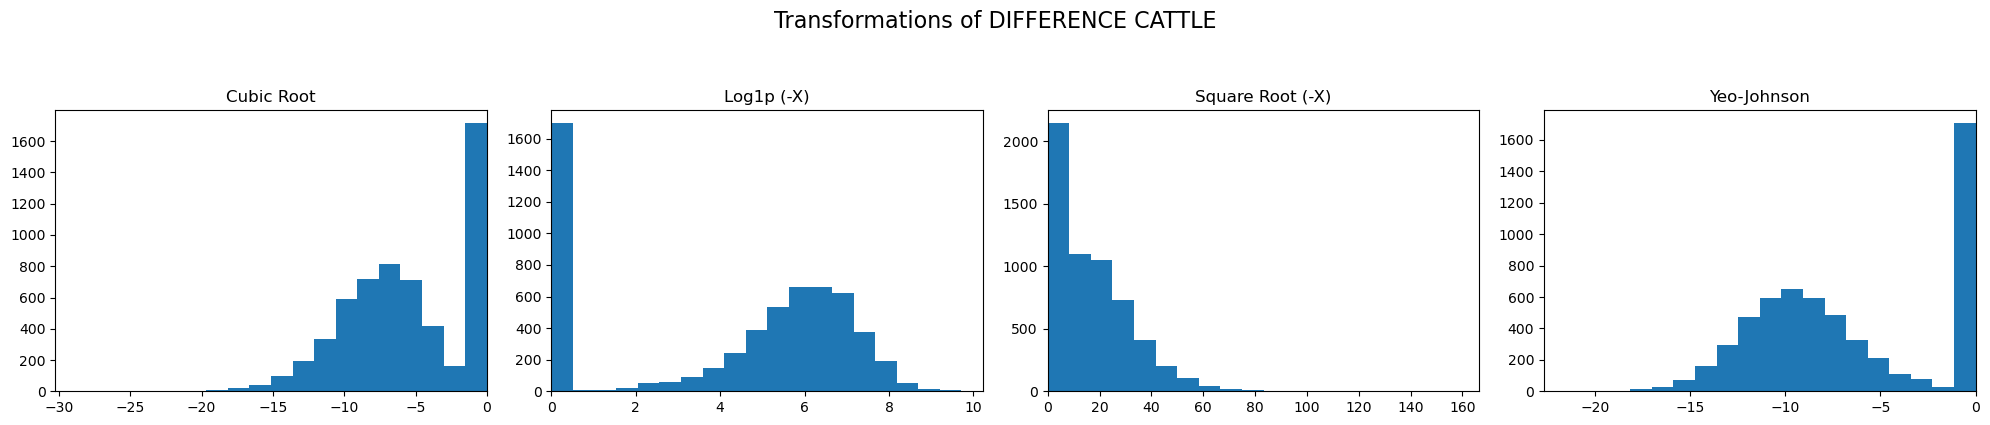

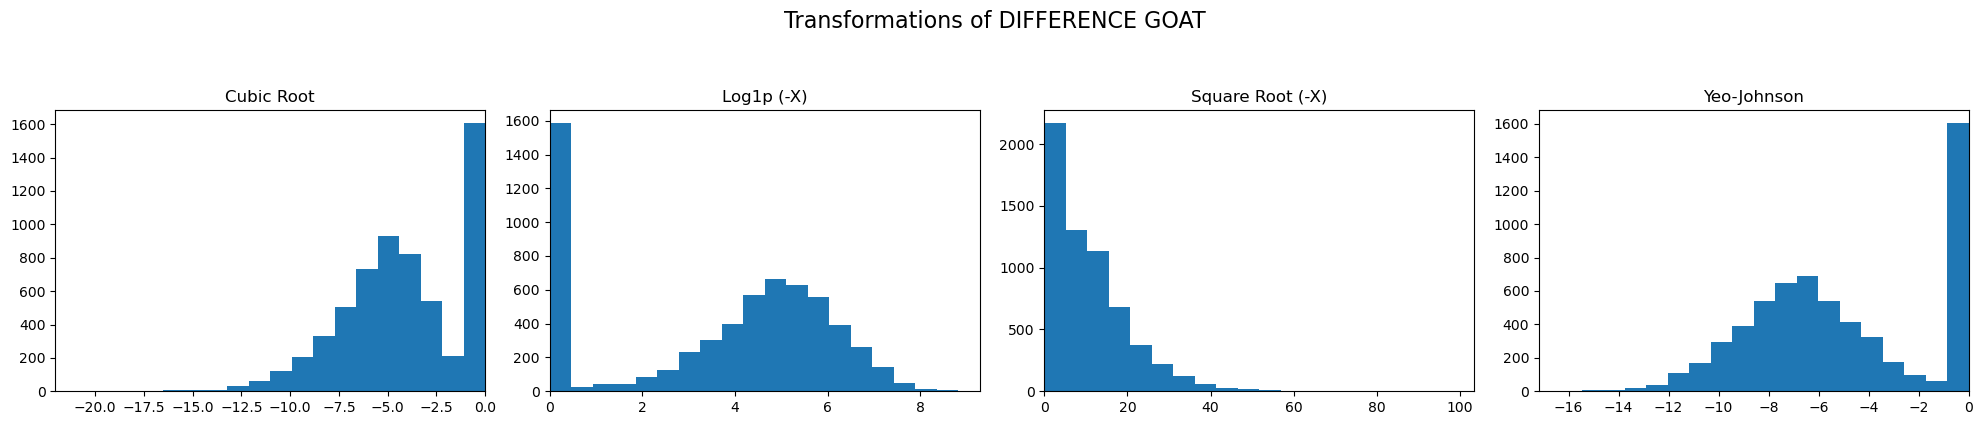

In [110]:
plot_transformations(df_long.cs_cs_diff_post_cattle, title_prefix="DIFFERENCE CATTLE")
plot_transformations(df_long.cs_cs_diff_post_goat, title_prefix="DIFFERENCE GOAT")

--> I think logarithmic version is the best solution as it's pretty normal and is easer to interpret later on
--> Perhaps undersample the 0s?

## Ratio

c:\anaconda_custom\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\anaconda_custom\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
c:\anaconda_custom\Lib\site-packages\pandas\core\arraylike.py:399: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


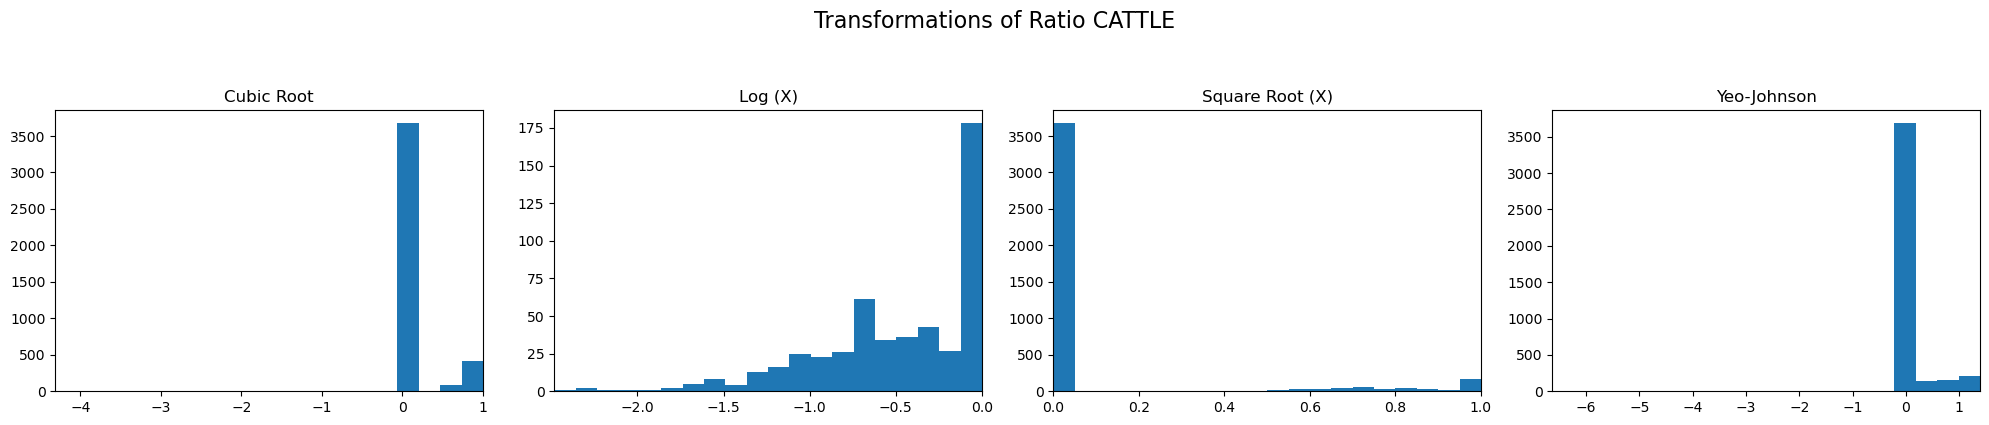

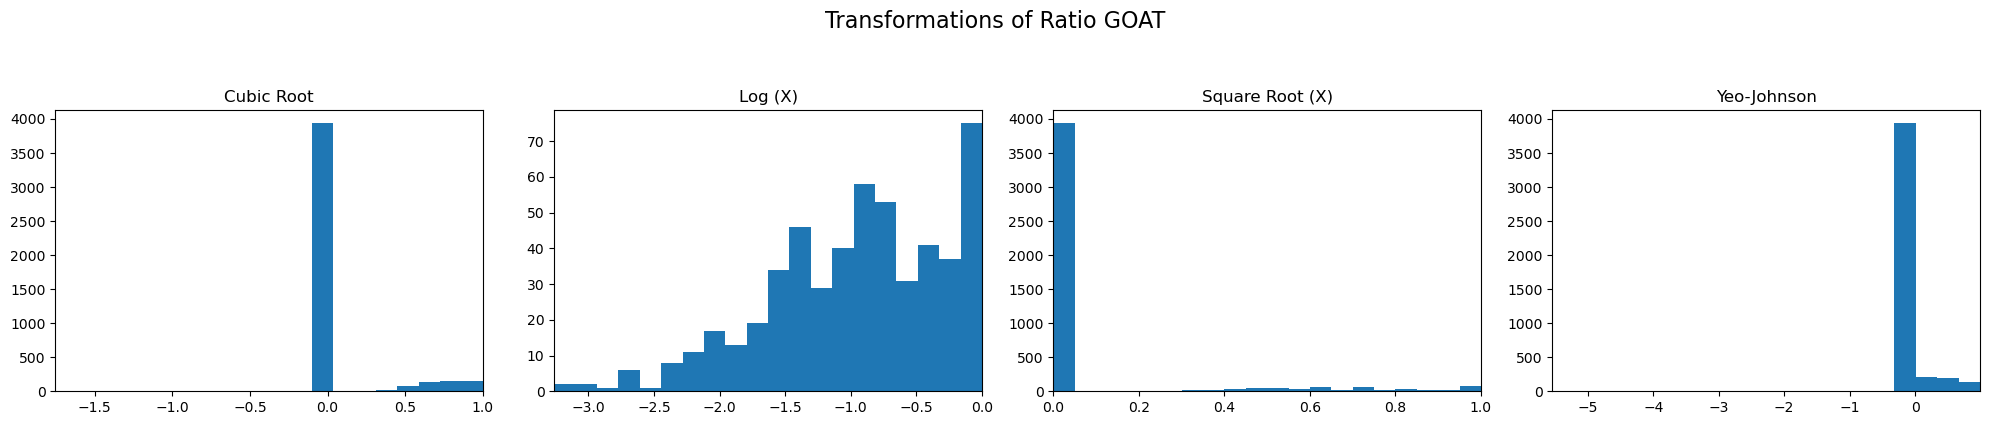

In [167]:
def plot_transformations(y, title_prefix="OUTCOME"):
    """
    Apply and plot several transformations of the input variable y.

    Args:
        y (pd.Series or np.array): The variable to transform and plot.
        title_prefix (str): Prefix for printed and plot titles.
    """
    # Define transformations to try
    transformations = {
        'Cubic Root': lambda x: np.cbrt(x),
        'Log (X)': lambda x: np.log(x),
        'Square Root (X)': lambda x: np.sqrt(x),
        'Yeo-Johnson': lambda x: stats.yeojohnson(x.dropna())[0]
    }

    fig, axes = plt.subplots(nrows=1, ncols=len(transformations), figsize=(5 * len(transformations), 4))

    # Add the overall title
    fig.suptitle(f"Transformations of {title_prefix}", fontsize=16, y=1.05)

    for ax, (name, func) in zip(axes, transformations.items()):
        try:
            transformed = func(y)

            # Drop NaNs and infs just in case - makes code more stable
            transformed = transformed[np.isfinite(transformed)]

            ax.hist(transformed, bins=20)
            ax.set_title(name)

            # Automatically adjust x-axis based on the transformed data
            ax.set_xlim(transformed.min(), transformed.max())

        except Exception as e:
            ax.set_title(f"{name}\n(Failed)")
            ax.axis('off')  # Hide the plot if transformation fails

    plt.tight_layout()
    plt.subplots_adjust(top=0.8)  # Make space for the overall title
    plt.show()


plot_transformations(df_long.cs_cs_ratio_post_cattle, title_prefix="Ratio CATTLE")
plot_transformations(df_long.cs_cs_ratio_post_goat, title_prefix="Ratio GOAT")

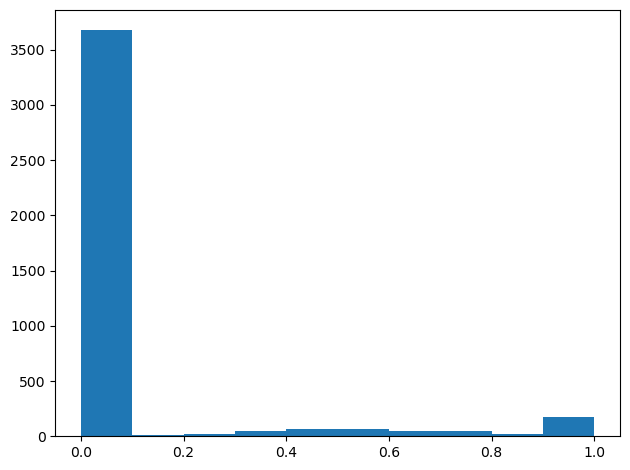

In [112]:
plt.hist(df_long.cs_cs_ratio_post_cattle, bins=10, range=[0, 1])
plt.tight_layout()

(array([3954.,   67.,   95.,   73.,   60.,   54.,   39.,   23.,   23.,
          71.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

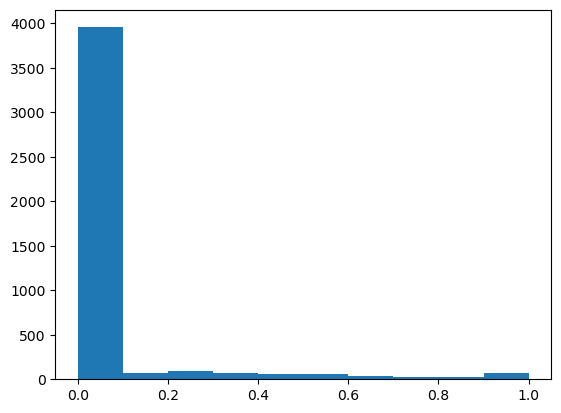

In [208]:
plt.hist(df_long.cs_cs_ratio_post_goat, bins=10, range=[0, 1])

In [168]:
xx = df_long[(df_long['cs_cs_ratio_post_cattle']>0.00 )& (df_long['cs_cs_ratio_post_cattle']<1)][['id', 'cs_cs_ratio_post_cattle']]
xx

,id,cs_cs_ratio_post_cattle
135,136,0.336782
573,574,0.351442
579,580,0.384962
611,612,0.672873
618,619,0.481089
...,...,...
6704,1873,0.946216
6770,1939,0.849154
6838,2007,0.522273
6945,2114,0.645352


# Correlation Analysis

In [172]:
df_long.columns

Index(['id', 'wave', 'afm_language', 'age_constant', 'agric_land',
       'amh_language', 'eng_language', 'expend', 'irrigated_land', 'risky',
       'buy_cattle', 'buy_goat', 'buy_nr_cattle', 'buy_nr_goat',
       'n_previd_cattle', 'n_previd_goat', 'cs_cs_diff_post_cattle',
       'cs_cs_ratio_post_cattle', 'cs_cs_diff_post_goat',
       'cs_cs_ratio_post_goat', 'number_minors', 'educ_child',
       'activity_child', 'chips_kalo_farm_land', 'chips_alcohol',
       'chips_chew_khat', 'chips_water_source',
       'chips_sell_livestock_investment', 'chips_migration_conflict',
       'chips_overnight', 'highest_educ', 'highest_educ_correct',
       'highest_educ_updated', 'highest_educ_updated_othe',
       'household_description', 'number_adults', 'main_info_source',
       'religion', 'owns_phone', 'household_moved', 'purchase_bin',
       'why_not_purchase', 'know_vip', 'relationship_vip', 'trust_vip',
       'advise_vip'],
      dtype='object')

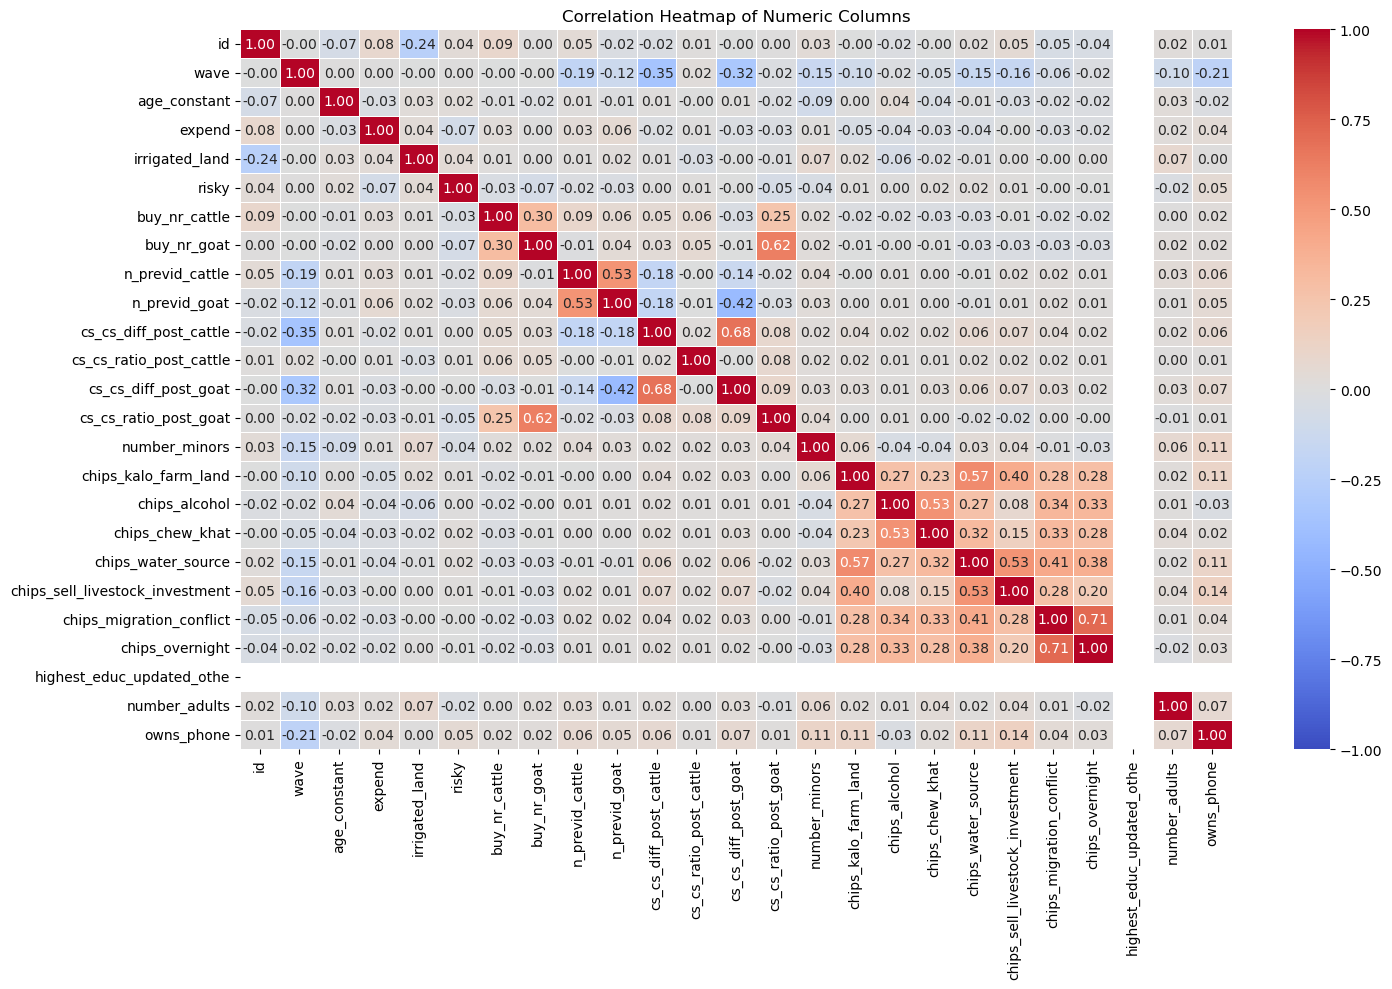

In [173]:
# Select numeric columns and compute correlations
numeric_cols = df_long.select_dtypes(include='number')
corr_matrix = numeric_cols.corr()

# Plot with diverging colormap and fixed scale
plt.figure(figsize=(15, 10))
sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',   # diverging colormap
    fmt=".2f",
    linewidths=0.5,
    vmin=-1, vmax=1
)
plt.title("Correlation Heatmap of Numeric Columns")
plt.tight_layout()
plt.show()


# T-Tests and Bar Charts for Categorical variables

In [175]:
def compare_groups(df, group_var, outcome_var, group_labels=('Group 0', 'Group 1'), do_plot=True, do_print=True):
    """
    Perform Welch's t-test and optionally print and plot results.

    Parameters:
    - df: pandas DataFrame containing the data.
    - group_var: column name (string) used to define the groups.
    - outcome_var: column name (string) of the outcome variable.
    - group_labels: tuple with labels for the two groups (default ('Group 0', 'Group 1')).
    - do_plot: whether to show the plot (default True).
    - do_print: whether to print statistics (default True).

    Returns:
    - Dictionary with t-statistic, p-value, means, and mean difference.
    """
    
    # Define groups
    group_values = df[group_var].dropna().unique()
    if len(group_values) != 2:
        raise ValueError("Grouping variable must have exactly two unique non-NA values.")
    
    group0 = df[df[group_var] == group_values[0]][outcome_var].dropna()
    group1 = df[df[group_var] == group_values[1]][outcome_var].dropna()
    
    # Compute mean difference
    mean_diff = group1.mean() - group0.mean()
    
    # Perform Welch's t-test
    t_stat, p_value = stats.ttest_ind(group0, group1, equal_var=False)
    
    # Output dictionary
    output = {
        't_statistic': t_stat,
        'p_value': p_value,
        'mean_group0': group0.mean(),
        'mean_group1': group1.mean(),
        'mean_difference': mean_diff,
        'group0_label': group_values[0],
        'group1_label': group_values[1]
    }
    
    # Only print if requested
    if do_print:
        print(f"T-statistic: {t_stat:.3f}")
        print(f"P-value: {p_value:.3f}")
        print(f"Average {group_labels[0]} ({group_values[0]}): {group0.mean():.3f}")
        print(f"Average {group_labels[1]} ({group_values[1]}): {group1.mean():.3f}")
        print(f"Difference ({group_labels[1]} - {group_labels[0]}): {mean_diff:.3f}")

    # Only plot if requested
    if do_plot:
        mean_values = df.groupby(group_var)[outcome_var].mean().loc[group_values]
        plt.figure(figsize=(6, 4))
        plt.bar(group_labels, mean_values, edgecolor='black')
        plt.ylabel(outcome_var)
        plt.title('Group Comparison')
        plt.tight_layout()
        plt.show()
    
    return output



Significant result for highest_educ_correct (p = 0.001)

T-statistic: -3.414
P-value: 0.001
Average Yes (Yes): -215.986
Average No (No): -173.162
Difference (No - Yes): 42.825


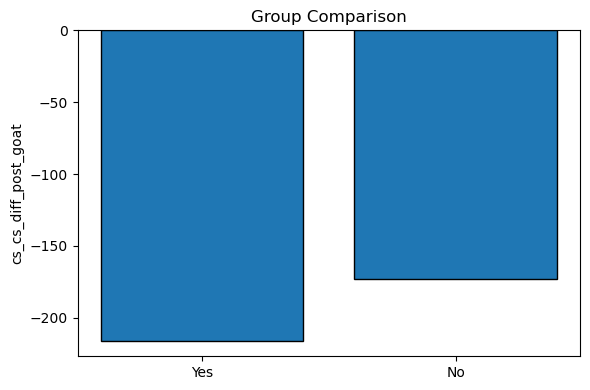


Significant result for household_moved (p = 0.000)

T-statistic: -7.166
P-value: 0.000
Average No (No): -221.232
Average Yes (Yes): -131.546
Difference (Yes - No): 89.686


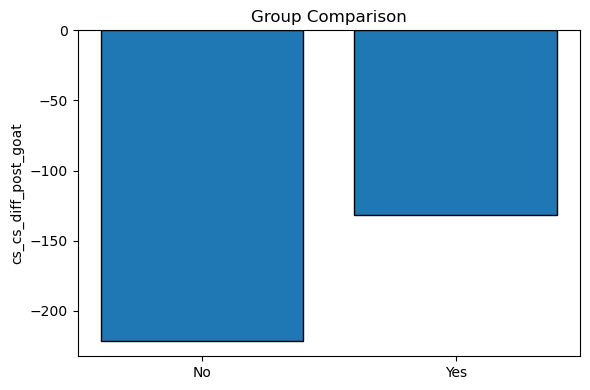


Significant result for purchase_bin (p = 0.000)

T-statistic: 4.889
P-value: 0.000
Average No (No): -195.514
Average Yes (Yes): -280.183
Difference (Yes - No): -84.669


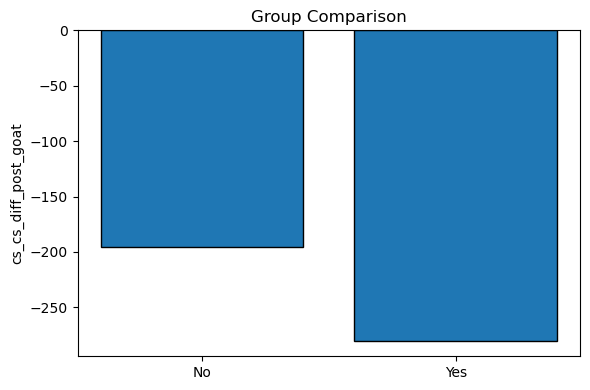


Significant result for know_vip (p = 0.000)

T-statistic: -5.226
P-value: 0.000
Average Yes (Yes): -216.171
Average No (No): -141.838
Difference (No - Yes): 74.333


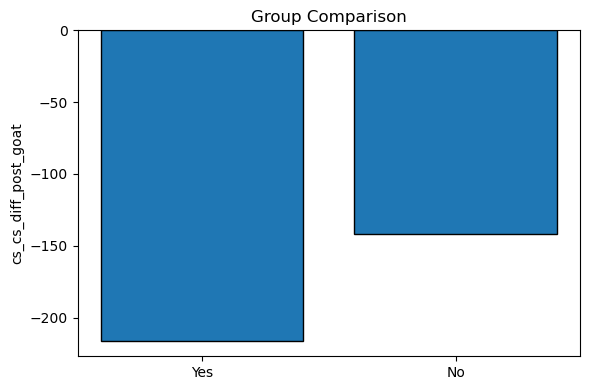


Significant result for trust_vip (p = 0.000)

T-statistic: -6.749
P-value: 0.000
Average Yes (Yes): -220.184
Average No (No): -122.283
Difference (No - Yes): 97.900


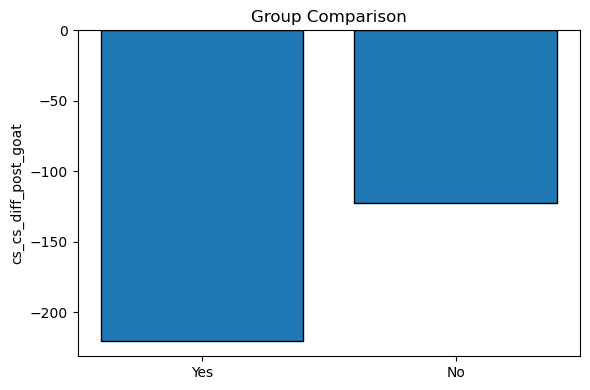


Significant result for advise_vip (p = 0.000)

T-statistic: -13.546
P-value: 0.000
Average Yes (Yes): -374.652
Average No (No): -157.815
Difference (No - Yes): 216.836


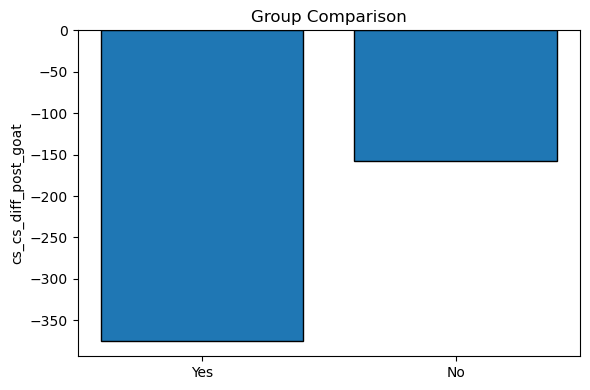

In [176]:
# Identify binary categorical variables
binary_categoricals = [col for col in df_long.select_dtypes(include=['object', 'category']).columns
                       if df_long[col].dropna().nunique() == 2]

# Loop and apply
results = {}

for cat_var in binary_categoricals:
    # First, run without printing or plotting
    output = compare_groups(df=df_long, group_var=cat_var, outcome_var='cs_cs_diff_post_goat', group_labels=tuple(df_long[cat_var].dropna().unique()), do_print=False, do_plot=False)
    
    # Then, only print and plot if p-value < 0.05
    if output['p_value'] < 0.05:
        print(f"\nSignificant result for {cat_var} (p = {output['p_value']:.3f})\n")
        
        # Now call again to actually print and plot
        compare_groups(df=df_long, group_var=cat_var, outcome_var='cs_cs_diff_post_goat', group_labels=(output['group0_label'], output['group1_label']), do_print=True, do_plot=True)
        
        results[cat_var] = output


# ANOVA for variables with >2 categories


Significant ANOVA result for activity_child (p = 0.245)


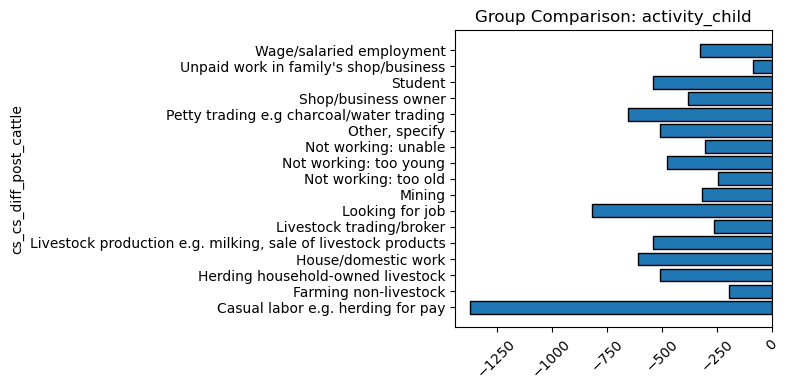


Significant ANOVA result for highest_educ (p = 0.000)


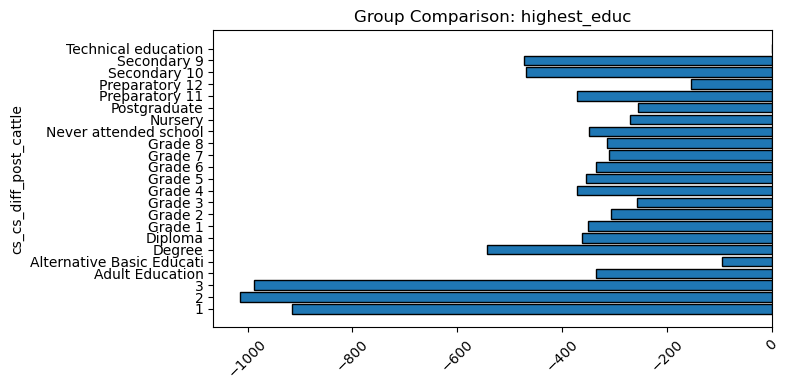


Significant ANOVA result for highest_educ_updated (p = 0.834)


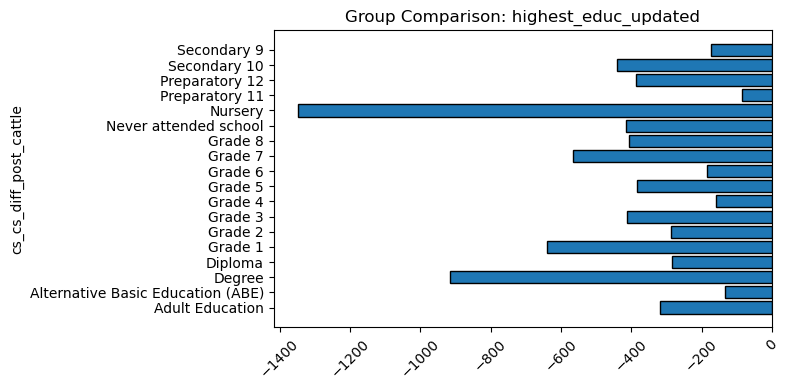


Significant ANOVA result for household_description (p = 0.000)


C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_115628\3561188434.py:30: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


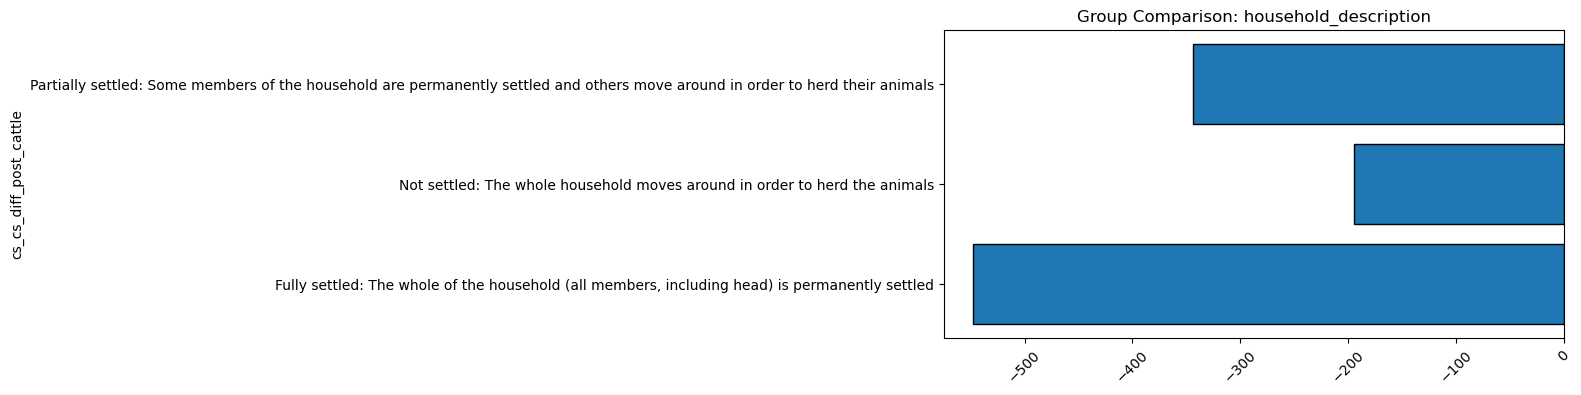


Significant ANOVA result for religion (p = 0.226)


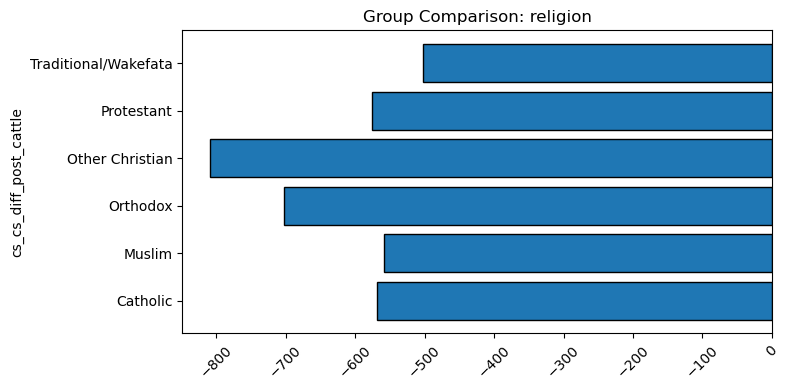


Significant ANOVA result for why_not_purchase (p = 0.000)


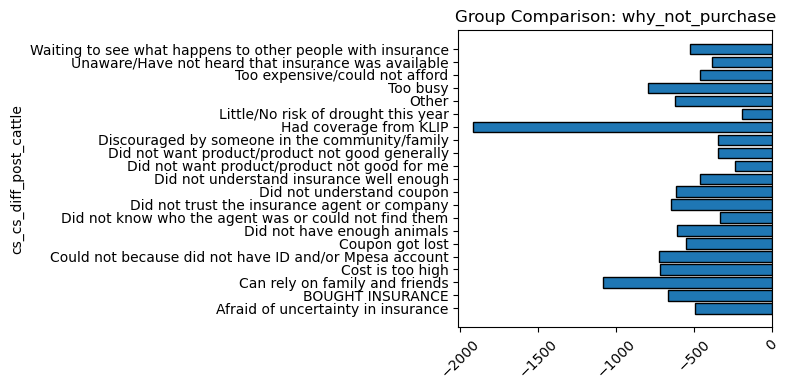


Significant ANOVA result for relationship_vip (p = 0.000)


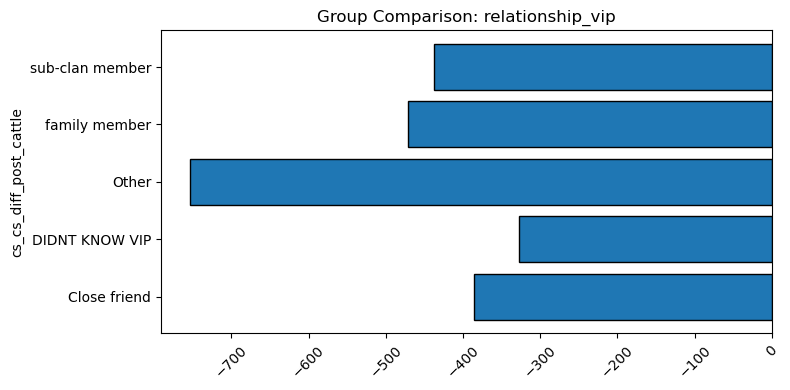

In [177]:

# Find variables with more than 2 categories
multi_categoricals = [
    col for col in df_long.select_dtypes(include=['object', 'category']).columns
    if df_long[col].dropna().nunique() > 2
]

# Loop over them and apply ANOVA
results = {}

for cat_var in multi_categoricals:
    groups = [
        df_long[df_long[cat_var] == val]['cs_cs_diff_post_cattle'].dropna()
        for val in df_long[cat_var].dropna().unique()
    ]
    
    # Only run ANOVA if all groups have data
    if all(len(g) > 0 for g in groups):
        f_stat, p_value = f_oneway(*groups)
        
        #if p_value < 0.05:
        print(f"\nSignificant ANOVA result for {cat_var} (p = {p_value:.3f})")
            
        # Plot means
        mean_values = df_long.groupby(cat_var)['cs_cs_diff_post_cattle'].mean()
        plt.figure(figsize=(8, 4))
        plt.barh(mean_values.index.astype(str), mean_values.values, edgecolor='black')
        plt.ylabel('cs_cs_diff_post_cattle')
        plt.title(f'Group Comparison: {cat_var}')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()
            
        results[cat_var] = {'f_statistic': f_stat, 'p_value': p_value}


In [ ]:
#df_long.to_excel("Data/df_long.xlsx")
#merged_df.to_excel("Data/merged_df.xlsx")

# Missingness

In [178]:
print("Number of Missings in cs_cs_diff_post_cattle:", df_long.cs_cs_diff_post_cattle.isna().sum())
print("Number of Missings in cs_cs_ratio_post_cattle:", df_long.cs_cs_ratio_post_cattle.isna().sum())
print("Number of Missings in cs_cs_diff_post_goat:", df_long.cs_cs_diff_post_goat.isna().sum())
print("Number of Missings in cs_cs_ratio_post_goat:", df_long.cs_cs_ratio_post_goat.isna().sum())

Number of Missings in cs_cs_diff_post_cattle: 1420
Number of Missings in cs_cs_ratio_post_cattle: 3056
Number of Missings in cs_cs_diff_post_goat: 1116
Number of Missings in cs_cs_ratio_post_goat: 2787


In [198]:
for column in df_long:
    number = df_long[column].isna().sum()
    if number > 0 and not column.startswith("cs") and not number==len(df_long):
        print(f"Number of Missings in {column}:", number)

for column in df_long:
    number = df_long[column].isna().sum()
    if number==len(df_long):
        print(f"ONLY Missings in {column}:", number)

for column in df_long:
    number = df_long[column].isna().sum()
    if number == 0:
        print(f"NO Missings in {column}:", number)

Number of Missings in afm_language: 21
Number of Missings in age_constant: 66
Number of Missings in agric_land: 21
Number of Missings in amh_language: 21
Number of Missings in eng_language: 21
Number of Missings in expend: 21
Number of Missings in irrigated_land: 4353
Number of Missings in risky: 21
Number of Missings in educ_child: 197
Number of Missings in activity_child: 197
Number of Missings in highest_educ: 34
Number of Missings in highest_educ_correct: 7
Number of Missings in highest_educ_updated: 6399
Number of Missings in main_info_source: 613
Number of Missings in religion: 15
Number of Missings in why_not_purchase: 8
Number of Missings in relationship_vip: 5212
ONLY Missings in highest_educ_updated_othe: 7248
NO Missings in id: 0
NO Missings in wave: 0
NO Missings in buy_cattle: 0
NO Missings in buy_goat: 0
NO Missings in buy_nr_cattle: 0
NO Missings in buy_nr_goat: 0
NO Missings in n_previd_cattle: 0
NO Missings in n_previd_goat: 0
NO Missings in number_minors: 0
NO Missing

In [ ]:
#df_long[["id", "wave", "irrigated_land"]].head(-50)


7248

In [180]:
not_miss_not_buy = df_long[(df_long['cs_cs_ratio_post_cattle'].notna()) & (df_long['buy_cattle']=='Not buy') & (df_long['cs_cs_ratio_post_cattle']<0.000) ][['id','wave', 'buy_cattle', 'cs_cs_ratio_post_cattle', 'cs_cs_diff_post_cattle']]
not_miss_not_buy = df_long[(df_long['cs_cs_ratio_post_goat'].notna()) & (df_long['buy_cattle']=='Not buy') & (df_long['cs_cs_ratio_post_goat']<0.000) ][['id','wave', 'buy_cattle', 'cs_cs_ratio_post_goat', 'cs_cs_diff_post_goat']]
not_miss_not_buy

,id,wave,buy_cattle,cs_cs_ratio_post_goat,cs_cs_diff_post_goat


In [181]:
not_miss_not_buy = df_long[(df_long['cs_cs_ratio_post_cattle'].notna()) &  (df_long['cs_cs_diff_post_cattle'].isna())][['id','wave', 'buy_cattle', 'cs_cs_ratio_post_cattle', 'cs_cs_diff_post_cattle']]
not_miss_not_buy

,id,wave,buy_cattle,cs_cs_ratio_post_cattle,cs_cs_diff_post_cattle


In [182]:
df_long.n_previd_goat.value_counts()

n_previd_goat
0      939
5      738
2      730
4      700
10     698
      ... 
170      1
95       1
61       1
112      1
192      1
Name: count, Length: 79, dtype: int64

Example below: Even tho household has goats, there are missings in y

In [196]:
not_miss_not_buy = df_long[(df_long['cs_cs_diff_post_goat'].isna()) &  (df_long['n_previd_goat']>0) ][['id','wave', 'n_previd_goat', 'buy_goat', 'cs_cs_ratio_post_goat', 'cs_cs_diff_post_goat']]
not_miss_not_buy.head(30) # 

,id,wave,n_previd_goat,buy_goat,cs_cs_ratio_post_goat,cs_cs_diff_post_goat
646,647,4,4,Buy,NaN,NaN
658,659,4,4,Buy,NaN,NaN
659,660,4,1,Buy,NaN,NaN
878,879,4,3,Buy,NaN,NaN
888,889,4,1,Buy,NaN,NaN
891,892,4,1,Buy,NaN,NaN
962,963,4,2,Buy,NaN,NaN
964,965,4,5,Buy,NaN,NaN
968,969,4,3,Buy,NaN,NaN
980,981,4,5,Buy,NaN,NaN


# FFIL

In [213]:
df_long

,id,wave,afm_language,age_constant,agric_land,amh_language,eng_language,expend,irrigated_land,risky,...,main_info_source,religion,owns_phone,household_moved,purchase_bin,why_not_purchase,know_vip,relationship_vip,trust_vip,advise_vip
0,1,4,No,25.0,Yes,No,No,0.0,2.0,70.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,NaN,Yes,Yes
1,2,4,Yes,27.0,Yes,No,No,0.0,0.0,20.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,NaN,Yes,Yes
2,3,4,Yes,29.0,No,No,No,1.0,NaN,22.0,...,insurance extension staff (including VIPs/Insu...,Protestant,0,No,No,Cost is too high,Yes,NaN,Yes,Yes
3,4,4,No,35.0,Yes,No,No,0.0,0.0,33.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,Other,Yes,Yes
4,5,4,No,36.0,Yes,No,No,1.0,2.0,34.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,NaN,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,2412,2,NaN,46.0,NaN,NaN,NaN,NaN,NaN,NaN,...,"neighbors, friends and relatives in informal g...",Traditional/Wakefata,1,No,No,Unaware/Have not heard that insurance was avai...,Yes,Close friend,Yes,No
7244,2413,2,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Oromia Insurance Company staff (OIC) excluding...,Protestant,1,No,Yes,BOUGHT INSURANCE,Yes,family member,Yes,No
7245,2414,2,NaN,38.0,NaN,NaN,NaN,NaN,NaN,NaN,...,insurance extension staff (including VIPs/Insu...,Traditional/Wakefata,0,No,No,Unaware/Have not heard that insurance was avai...,Yes,NaN,Yes,No
7246,2415,2,NaN,56.0,NaN,NaN,NaN,NaN,NaN,NaN,...,Oromia Insurance Company staff (OIC) excluding...,Traditional/Wakefata,1,No,No,Waiting to see what happens to other people wi...,Yes,NaN,Yes,No


In [212]:
for column in df_long:
    number = df_long[column].isna().sum()
    if number > 0 and not column.startswith("cs") and not number==len(df_long):
        print(f"Number of Missings in {column}:", number)

for column in df_long:
    number = df_long[column].isna().sum()
    if number==len(df_long):
        print(f"ONLY Missings in {column}:", number)

#for column in df_long:
#    number = df_long[column].isna().sum()
#    if number == 0:
#        print(f"NO Missings in {column}:", number)

Number of Missings in afm_language: 21
Number of Missings in age_constant: 66
Number of Missings in agric_land: 21
Number of Missings in amh_language: 21
Number of Missings in eng_language: 21
Number of Missings in expend: 21
Number of Missings in irrigated_land: 4353
Number of Missings in risky: 21
Number of Missings in educ_child: 197
Number of Missings in activity_child: 197
Number of Missings in highest_educ: 34
Number of Missings in highest_educ_correct: 7
Number of Missings in highest_educ_updated: 6399
Number of Missings in main_info_source: 613
Number of Missings in religion: 15
Number of Missings in why_not_purchase: 8
Number of Missings in relationship_vip: 5212
ONLY Missings in highest_educ_updated_othe: 7248


In [221]:
df_filled = df_long
df_filled['educ_child'] = df_filled.groupby('id')['educ_child'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
df_filled['main_info_source'] = df_filled.groupby('id')['main_info_source'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
df_filled['relationship_vip'] = df_filled.groupby('id')['relationship_vip'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
df_filled['why_not_purchase'] = df_filled.groupby('id')['why_not_purchase'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
df_filled['irrigated_land'] = df_filled.groupby('id')['irrigated_land'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
df_filled['activity_child'] = df_filled.groupby('id')['activity_child'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
df_filled['religion'] = df_filled.groupby('id')['religion'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
df_filled['age_constant'] = df_filled.groupby('id')['age_constant'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))

for column in df_filled:
    number = df_filled[column].isna().sum()
    if number > 0 and not column.startswith("cs") and not number==len(df_filled):
        print(f"Number of Missings in {column}:", number)

C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_115628\1926883225.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled['educ_child'] = df_filled.groupby('id')['educ_child'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
C:\Users\Marion Späth\AppData\Local\Temp\ipykernel_115628\1926883225.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_filled['relationship_vip'] = df_filled.groupby('id')['relationship_vip'].transform(lambda x: x.ffill().bfill().infer_objects(copy=False))
C:\Users\Marion Späth\AppData\Local\Temp\ipykern

Number of Missings in afm_language: 21
Number of Missings in age_constant: 66
Number of Missings in agric_land: 21
Number of Missings in amh_language: 21
Number of Missings in eng_language: 21
Number of Missings in expend: 21
Number of Missings in irrigated_land: 4353
Number of Missings in risky: 21
Number of Missings in educ_child: 3
Number of Missings in activity_child: 3
Number of Missings in highest_educ: 34
Number of Missings in highest_educ_correct: 7
Number of Missings in highest_educ_updated: 6399
Number of Missings in religion: 15
Number of Missings in relationship_vip: 2877


# Goat df

In [225]:
len(df_filled)

7248

In [231]:
df_filled['cs_cs_diff_post_goat']#.head(30)

0       -120.671875
1       -758.621033
2      -1180.266846
3        -53.165897
4       -513.432312
           ...     
7243       0.000000
7244       0.000000
7245       0.000000
7246       0.000000
7247       0.000000
Name: cs_cs_diff_post_goat, Length: 7248, dtype: float64

In [241]:
#df_filled.replace(["nan", "NA", "None"], np.nan, inplace=True)
goat_df = df_filled[df_filled['cs_cs_diff_post_goat'].notna() & df_filled['cs_cs_ratio_post_goat'].notna()]
goat_df#.head(20)

,id,wave,afm_language,age_constant,agric_land,amh_language,eng_language,expend,irrigated_land,risky,...,main_info_source,religion,owns_phone,household_moved,purchase_bin,why_not_purchase,know_vip,relationship_vip,trust_vip,advise_vip
0,1,4,No,25.0,Yes,No,No,0.0,2.0,70.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,Close friend,Yes,Yes
1,2,4,Yes,27.0,Yes,No,No,0.0,0.0,20.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,DIDNT KNOW VIP,Yes,Yes
2,3,4,Yes,29.0,No,No,No,1.0,NaN,22.0,...,insurance extension staff (including VIPs/Insu...,Protestant,0,No,No,Cost is too high,Yes,sub-clan member,Yes,Yes
3,4,4,No,35.0,Yes,No,No,0.0,0.0,33.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,Other,Yes,Yes
4,5,4,No,36.0,Yes,No,No,1.0,2.0,34.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,NaN,Yes,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,2403,2,No,35.0,No,No,No,0.0,NaN,40.0,...,Oromia Insurance Company staff (OIC) excluding...,Protestant,1,Yes,No,Did not understand insurance well enough,Yes,NaN,Yes,No
7236,2405,2,No,18.0,Yes,No,No,1.0,0.0,14.0,...,survey conducted by ILRI,Protestant,1,No,No,Did not understand insurance well enough,No,DIDNT KNOW VIP,Yes,No
7237,2406,2,No,58.0,No,No,No,0.0,NaN,7.0,...,enumerators,Traditional/Wakefata,0,No,No,Other,Yes,NaN,Yes,No
7239,2408,2,No,NaN,Yes,No,No,1.0,0.0,15.0,...,Oromia Insurance Company staff (OIC) excluding...,Traditional/Wakefata,1,No,No,Did not trust the insurance agent or company,Yes,Close friend,Yes,No


In [242]:
for column in goat_df:
    number = goat_df[column].isna().sum()
    if number > 0 and not column.startswith("cs") and not number==len(goat_df):
        print(f"Number of Missings in {column}:", number)

for column in goat_df:
    number = goat_df[column].isna().sum()
    if number==len(goat_df):
        print(f"ONLY Missings in {column}:", number)

for column in goat_df:
    number = goat_df[column].isna().sum()
    if number == 0:
        print(f"NO Missings in {column}:", number)

Number of Missings in afm_language: 11
Number of Missings in age_constant: 38
Number of Missings in agric_land: 11
Number of Missings in amh_language: 11
Number of Missings in eng_language: 11
Number of Missings in expend: 11
Number of Missings in irrigated_land: 2706
Number of Missings in risky: 11
Number of Missings in educ_child: 3
Number of Missings in activity_child: 3
Number of Missings in highest_educ: 25
Number of Missings in highest_educ_correct: 2
Number of Missings in highest_educ_updated: 3952
Number of Missings in religion: 6
Number of Missings in relationship_vip: 1746
ONLY Missings in highest_educ_updated_othe: 4461
NO Missings in id: 0
NO Missings in wave: 0
NO Missings in buy_cattle: 0
NO Missings in buy_goat: 0
NO Missings in buy_nr_cattle: 0
NO Missings in buy_nr_goat: 0
NO Missings in n_previd_cattle: 0
NO Missings in n_previd_goat: 0
NO Missings in cs_cs_diff_post_goat: 0
NO Missings in cs_cs_ratio_post_goat: 0
NO Missings in number_minors: 0
NO Missings in chips_k

# Cattle df

In [244]:
#df_filled.replace(["nan", "NA", "None"], np.nan, inplace=True)
cattle_df = df_filled[df_filled['cs_cs_diff_post_cattle'].notna() & df_filled['cs_cs_ratio_post_cattle'].notna()]
cattle_df#.head(20)

,id,wave,afm_language,age_constant,agric_land,amh_language,eng_language,expend,irrigated_land,risky,...,main_info_source,religion,owns_phone,household_moved,purchase_bin,why_not_purchase,know_vip,relationship_vip,trust_vip,advise_vip
0,1,4,No,25.0,Yes,No,No,0.0,2.0,70.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,Close friend,Yes,Yes
1,2,4,Yes,27.0,Yes,No,No,0.0,0.0,20.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,DIDNT KNOW VIP,Yes,Yes
2,3,4,Yes,29.0,No,No,No,1.0,NaN,22.0,...,insurance extension staff (including VIPs/Insu...,Protestant,0,No,No,Cost is too high,Yes,sub-clan member,Yes,Yes
3,4,4,No,35.0,Yes,No,No,0.0,0.0,33.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,Other,Yes,Yes
5,6,4,No,60.0,Yes,No,No,0.0,0.0,18.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,Other,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7234,2403,2,No,35.0,No,No,No,0.0,NaN,40.0,...,Oromia Insurance Company staff (OIC) excluding...,Protestant,1,Yes,No,Did not understand insurance well enough,Yes,NaN,Yes,No
7236,2405,2,No,18.0,Yes,No,No,1.0,0.0,14.0,...,survey conducted by ILRI,Protestant,1,No,No,Did not understand insurance well enough,No,DIDNT KNOW VIP,Yes,No
7237,2406,2,No,58.0,No,No,No,0.0,NaN,7.0,...,enumerators,Traditional/Wakefata,0,No,No,Other,Yes,NaN,Yes,No
7239,2408,2,No,NaN,Yes,No,No,1.0,0.0,15.0,...,Oromia Insurance Company staff (OIC) excluding...,Traditional/Wakefata,1,No,No,Did not trust the insurance agent or company,Yes,Close friend,Yes,No


In [245]:
for column in cattle_df:
    number = cattle_df[column].isna().sum()
    if number > 0 and not column.startswith("cs") and not number==len(cattle_df):
        print(f"Number of Missings in {column}:", number)

for column in cattle_df:
    number = cattle_df[column].isna().sum()
    if number==len(cattle_df):
        print(f"ONLY Missings in {column}:", number)

for column in cattle_df:
    number = cattle_df[column].isna().sum()
    if number == 0:
        print(f"NO Missings in {column}:", number)

Number of Missings in afm_language: 8
Number of Missings in age_constant: 33
Number of Missings in agric_land: 8
Number of Missings in amh_language: 8
Number of Missings in eng_language: 8
Number of Missings in expend: 8
Number of Missings in irrigated_land: 2516
Number of Missings in risky: 8
Number of Missings in educ_child: 3
Number of Missings in activity_child: 3
Number of Missings in highest_educ: 23
Number of Missings in highest_educ_correct: 2
Number of Missings in highest_educ_updated: 3742
Number of Missings in religion: 6
Number of Missings in relationship_vip: 1653
ONLY Missings in highest_educ_updated_othe: 4192
NO Missings in id: 0
NO Missings in wave: 0
NO Missings in buy_cattle: 0
NO Missings in buy_goat: 0
NO Missings in buy_nr_cattle: 0
NO Missings in buy_nr_goat: 0
NO Missings in n_previd_cattle: 0
NO Missings in n_previd_goat: 0
NO Missings in cs_cs_diff_post_cattle: 0
NO Missings in cs_cs_ratio_post_cattle: 0
NO Missings in number_minors: 0
NO Missings in chips_kal

In [248]:
cattle_df['id'].nunique()

2219

In [262]:
test = cattle_df[cattle_df['age_constant'].notna() & cattle_df['afm_language'].notna() & cattle_df['religion'].notna()]
test

,id,wave,afm_language,age_constant,agric_land,amh_language,eng_language,expend,irrigated_land,risky,...,main_info_source,religion,owns_phone,household_moved,purchase_bin,why_not_purchase,know_vip,relationship_vip,trust_vip,advise_vip
0,1,4,No,25.0,Yes,No,No,0.0,2.0,70.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,Close friend,Yes,Yes
1,2,4,Yes,27.0,Yes,No,No,0.0,0.0,20.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,DIDNT KNOW VIP,Yes,Yes
2,3,4,Yes,29.0,No,No,No,1.0,NaN,22.0,...,insurance extension staff (including VIPs/Insu...,Protestant,0,No,No,Cost is too high,Yes,sub-clan member,Yes,Yes
3,4,4,No,35.0,Yes,No,No,0.0,0.0,33.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not have enough animals,Yes,Other,Yes,Yes
5,6,4,No,60.0,Yes,No,No,0.0,0.0,18.0,...,enumerators,Traditional/Wakefata,0,No,No,Did not understand insurance well enough,Yes,Other,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7231,2400,2,No,45.0,Yes,No,No,0.0,1.0,52.0,...,Oromia Insurance Company staff (OIC) excluding...,Traditional/Wakefata,0,No,No,Unaware/Have not heard that insurance was avai...,Yes,sub-clan member,Yes,No
7234,2403,2,No,35.0,No,No,No,0.0,NaN,40.0,...,Oromia Insurance Company staff (OIC) excluding...,Protestant,1,Yes,No,Did not understand insurance well enough,Yes,NaN,Yes,No
7236,2405,2,No,18.0,Yes,No,No,1.0,0.0,14.0,...,survey conducted by ILRI,Protestant,1,No,No,Did not understand insurance well enough,No,DIDNT KNOW VIP,Yes,No
7237,2406,2,No,58.0,No,No,No,0.0,NaN,7.0,...,enumerators,Traditional/Wakefata,0,No,No,Other,Yes,NaN,Yes,No


In [265]:
print(cattle_df['id'].nunique())
print(test['id'].nunique())
print(2219-2190)

2219
2190
29


In [258]:
test['expend'].isna().sum()

0

In [264]:
for column in test:
    number = test[column].isna().sum()
    if number > 0 and not column.startswith("cs") and not number==len(test):
        print(f"Number of Missings in {column}:", number)

for column in test:
    number = test[column].isna().sum()
    if number==len(test):
        print(f"ONLY Missings in {column}:", number)

for column in test:
    number = test[column].isna().sum()
    if number == 0:
        print(f"NO Missings in {column}:", number)

Number of Missings in irrigated_land: 2478
Number of Missings in educ_child: 3
Number of Missings in activity_child: 3
Number of Missings in highest_educ: 22
Number of Missings in highest_educ_correct: 1
Number of Missings in highest_educ_updated: 3698
Number of Missings in relationship_vip: 1634
ONLY Missings in highest_educ_updated_othe: 4145
NO Missings in id: 0
NO Missings in wave: 0
NO Missings in afm_language: 0
NO Missings in age_constant: 0
NO Missings in agric_land: 0
NO Missings in amh_language: 0
NO Missings in eng_language: 0
NO Missings in expend: 0
NO Missings in risky: 0
NO Missings in buy_cattle: 0
NO Missings in buy_goat: 0
NO Missings in buy_nr_cattle: 0
NO Missings in buy_nr_goat: 0
NO Missings in n_previd_cattle: 0
NO Missings in n_previd_goat: 0
NO Missings in cs_cs_diff_post_cattle: 0
NO Missings in cs_cs_ratio_post_cattle: 0
NO Missings in number_minors: 0
NO Missings in chips_kalo_farm_land: 0
NO Missings in chips_alcohol: 0
NO Missings in chips_chew_khat: 0
NO 